<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Group Assignment</strong></h1>
<h2 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Occupancy Estimation</strong></h2>

### <b>Group 10</b>
### <b>Student Name: Nguyen Dang Huynh Chau (s3777214)</b>
### <b>Student Name: Truong Phu Khang (s3814172)</b>
### <b>Student Name: Le Anh Quan (s3777351) </b>

### <b>Course: EEET2485 - Research Method for Engineers</b>
### <b>Lecturer: Dr. Dao Vu Truong Son</b>

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📜 Table of Content</strong></h1>

### 1. [Data Preparation](#1)

1.1 [Introduction](#1.1) 

1.2 [Target question for insights](#1.2)

1.3 [Importing Necessary Libraries and datasets](#1.3)

1.4 [Data Retrieving](#1.4)

1.5 [Data information](#1.5)

<br>

### 2. [Data Cleaning](#2)

2.1 [About This Dataset](#2.1)

2.2 [Drop duplicate](#2.2)

<br>

### 3. [Data exploration (EDA)](#3)

3.1 [Outliers](#3.1)

> - 3.1.1 [Descriptive statistics for Central Tendency](#3.1.1) 
> - 3.1.2 [Detecting and Dealing with outliers](#3.1.2) 

3.2 [Correlation between columns](#3.2)

> - 3.2.1 [Correlation of the temperature sensors](#3.2.1) 
> - 3.2.2 [Correlation of the light sensors](#3.2.2) 
> - 3.2.3 [Correlation of the sound sensors](#3.2.3) 
> - 3.2.4 [Correlation of the CO2 sensors](#3.2.4) 
> - 3.2.5 [Multicorrelational problem](#3.2.5) 

3.3 [Analyse Room Occupation causation](#3.3)

> - 3.3.1 [Bartlett’s test](#3.3.1) 
> - 3.3.2 [Choosing the Number of Factors](#3.3.2) 

3.4 [Analyse Room Occupation in different condition](#3.4)

> - 3.4.1 [EDA the main factors (`S1_Light` and `S5_CO2` with the `Room_Occupancy_Count`)](#3.4.1) 
> - 3.4.2 [Statistical Test](#3.4.2) 

<br>

### 4. [Reference](#4)

<hr>

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> ✍️ 1. Data Preparation</strong></h1>

<a id="1.1"></a>
# ️🎯 1.1 Introduction
****
<p style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black"> The world population has shown a considerable upward trend recently, so that the buying and selling an occupation has received a great academic attention. In this project, we have conducted research on a provided dataset which is about the “Room Occupancy Estimation” by Adarsh Pal Singh and Dr. Sachin Chaudhari.  We examined machine behavior pattern in numerous aspects using approaches and analytical tools provided in Pandas, including factor collaborations, data probability distributions, and room occupancy causes. Based on the defined aspects, we develop a list of research questions to investigate the nature of our dataset based on the mentioned features.</p>

<a id="1.2"></a>
# ️🎯 1.2 Target question for insights
****
## A.	Analyze correlations between each parameter:
> -	***Correlation between Temperature Feature***:
>> - Correlation between S1_Temp and S2_Temp.
>> - Correlation between S1_Temp and S3_Temp.
>> - Correlation between S1_Temp and S4_Temp.
> -	***Correlation between Light Feature***:
>> - Correlation between S1_Light and S2_Light.
>> - Correlation between S1_Light and S2_Light.
>> - Correlation between S1_Light and S4_Light
> -	***Correlation between Sound Feature***:
>> - Correlation between S1_Sound and S2_Sound.
>> - Correlation between S1_Sound and S3_Sound.
>> - Correlation between S1_Sound and S4_Sound.
> -	***Correlation between CO2 Feature***:
>> - Correlation between S5_CO2 and S5_CO2_Slope.
> -	***Correlation between PIR Feature***:
>> - Correlation between S6_PIR and S7_PIR.

## B.	Analyze room occupancy condition:
> - What is the main factor to the growth of room occupancy count? 
> - Which factors often occur together when there is at least one people in the room?

## C.	Analyze room occupancy in different condition:
> - How the main factor influencing the `Room_Occupancy_Count`.

<a id="1.3"></a>
# ✴️ 1.3 Importing Necessary Libraries and datasets
****

In [1]:
import sys
!{sys.executable} -m pip -q install missingno
!{sys.executable} -m pip -q install factor_analyzer
!{sys.executable} -m pip -q install pingouin
!{sys.executable} -m pip -q install researchpy

# import libraries which are pandas and numpy
import pandas as pd
import numpy as np
#This is library for missing values drawing
import missingno as msno
#This library is for factor analysise
from factor_analyzer import FactorAnalyzer 
#This library is for Bartlett ’s test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
#This library is for Kaiser-Meyer-Olkin (KMO) Test
from factor_analyzer.factor_analyzer import calculate_kmo
#Factor analysis
import pingouin as pg
#This is is for Correlation test
from scipy.stats import spearmanr
#This is is for Mann-Whitney Testing
import scipy.stats as stats


#for plots
import matplotlib.pyplot as plt
#This is for setting the size of plots
plt.rcParams["figure.figsize"]= 20,15
from scipy import stats #This is for state model and ploting
import statsmodels.api as sm #This is for state model report


#Libraries for plotting
# Modules for data visualization
import seaborn as sns
import matplotlib.patches as mpatches
sns.set_theme(style="ticks", color_codes=True) #set theme in seaborn
# scatter matrix library
from pandas.plotting import scatter_matrix

## Check numpy and pandas version

In [2]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.21.5
Pandas version:  1.4.2
Python 3.9.12


### ------------> OBSERVATION
***
I want to check the numpy and pandas version since I want to make sure the verson is appropriate for my work load. Currently, it is still appropriate

<a id="1.4"></a>
# 📲 1.4 Data Retrieving
***


In [3]:
df = pd.read_csv("Data/Occupancy_Estimation.csv", delimiter=',', skipinitialspace = True)

df.columns = df.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(df.shape))

# drop Unnamed, it is just a number given to identify each house
df.head(3)

The shape of the ORGINAL data is (row, column): (10129, 19)


,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1


<a id="1.5"></a>
# 🔈 1.5 Data Information
****
I want to have an overall look on both of the train and test dataset, so I use .shape and .info() function in python to do that.

In [4]:
print ("The shape of the train data is (row, column):"+ str(df.shape))
print (df.info())

The shape of the train data is (row, column):(10129, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2       

### ------------> OBSERVATION
***
From this, the information that I gained from the train dataset are the total record is 10129 with no missing and it has 19 columns with the target variable `Room_Occupancy_Count.

<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 🧹 2. Data Cleaning</strong></h1>

<a id="2.1"></a>
# 🦄 2.1 About This Dataset
***
Let's investigate the datatype of the dataset a little bit.
***
**Categorical:**    
- **Ordinal** (just like nominal datatype but can be ordered or ranked)
> - **Date** YYYY/MM/DD: the date of the experiment
> - **Time**: the time of the experiment
> - **Room_Occupancy_Count**: Ground Truth

***
**Numeric:**
- **Continous**
    >  - **S1_Temp**: Sensor nodes 1 temperature
    >  - **S2_Temp**: Sensor nodes 2 temperature
    >  - **S3_Temp**: Sensor nodes 3 temperature
    >  - **S4_Temp**: Sensor nodes 4 temperature
    >  - **S1_Temp**: Sensor nodes 1 temperature
    >  - **S1_Light**: Sensor nodes 1 light
    >  - **S2_Light**: Sensor nodes 2 light
    >  - **S3_Light**: Sensor nodes 3 light
    >  - **S4_Light**: Sensor nodes 4 light
    >  - **S1_Sound**: Sensor nodes 1 sound
    >  - **S2_Sound**: Sensor nodes 2 sound
    >  - **S3_Sound**: Sensor nodes 3 sound
    >  - **S4_Sound**: Sensor nodes 4 sound
    >  - **S5_CO2**: Sensor nodes 5 CO2
    >  - **S5_CO2_Slope**: Sensor nodes 1 temperature
    >  - **S6_PIR**: digital passive infrared (PIR) sensor nodes 6 in the room.
    >  - **S7_PIR**: digital passive infrared (PIR) sensor nodes 7 in the room.

<a id="2.2"></a>
# 🦄 2.2 Drop duplicate
***
Firstly, we want to drop duplicate

In [5]:
print ("The shape of the data set before dropping duplicated:"+ str(df.shape))

df = df.drop_duplicates()

print ("The shape of the data set after dropping duplicated:"+ str(df.shape))

The shape of the data set before dropping duplicated:(10129, 19)
The shape of the data set after dropping duplicated:(10129, 19)


### ------------> OBSERVATION
***
In our data there is no duplicated values.

<a id="3"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📊 3. Data Exploration </strong></h1>

****

<a id="3.1"></a>
# 3.1 Outliers
****
## Detect and Dropping regulation: 
For the outliers, I want to detect them first. There are 2 scenarios which is the percentage of outliers is less than and equal 6 or the outliers is over 6 percent. For the percentage of outliers which is equal or less than 6, I will drop them since it does not effect much to our data, however, if the percentage of outliers is higher than 6 then I will investigate more. In case, all of the outliers have at least 1 person in that room, I do not drop it, since it indicate that in the "extreme" condition, that room have at least one people. In the scenario that there is just about less than 20 percent of the outliers have at least 1 people in the room, then I will drop that outliers since those outliers are just the noise data, which cause bias for the later model. Lastly, if there is more than 60 percent of outliers have at least one people in the room, then I will just drop the noise that do not have anyone in room. 
*****
## Outliers Dealing Method: 
I will deal outliers with box plot and IQR-distance from Median. The Z-Score, Quantile Filter, and IQR-distance from Median are three common methods for dealing with outliers. The Z-Score is used to calculate the mean and standard deviation. As a result, the evaluation of outliers may be skewed. The Quantile Filter is a superior strategy, however it can remove some of the parts that aren't outliers, resulting in a significant quantity of good data being lost while the outliers remain.

The minimum is known as Q0, the lower quartile is known as Q1, the median is known as Q2, the upper quartile is known as Q3, and the maximum is known as Q4. Q1, Q2, and Q3 mean:
> - Q1: greater than one-quarter of the data
> -Q2: greater than two-quarters of the data.
> -Q3: more than three-quarters of the data.

The InterQuatile Range, or IQR, is what is measured when the spread is measured. The IQR shows how evenly distributed the middle half of the data is. As a result of measuring IQR, values that are far from the center are identified and labeled as outliers.)

<a id="3.1.1"></a>
## 3.1.1 Descriptive statistics for Central Tendency

In [6]:
# see the static of all numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S1_Temp,10129.0,25.454012,0.351351,24.940000,25.190000,25.38,25.63,26.380000
S2_Temp,10129.0,25.546059,0.586325,24.750000,25.190000,25.38,25.63,29.000000
S3_Temp,10129.0,25.056621,0.427283,24.440000,24.690000,24.94,25.38,26.190000
S4_Temp,10129.0,25.754125,0.356434,24.940000,25.440000,25.75,26.00,26.560000
S1_Light,10129.0,25.445059,51.011264,0.000000,0.000000,0.00,12.00,165.000000
S2_Light,10129.0,26.016290,67.304170,0.000000,0.000000,0.00,14.00,258.000000
S3_Light,10129.0,34.248494,58.400744,0.000000,0.000000,0.00,50.00,280.000000
S4_Light,10129.0,13.220259,19.602219,0.000000,0.000000,0.00,22.00,74.000000
S1_Sound,10129.0,0.168178,0.316709,0.060000,0.070000,0.08,0.08,3.880000
S2_Sound,10129.0,0.120066,0.266503,0.040000,0.050000,0.05,0.06,3.440000


<AxesSubplot:>

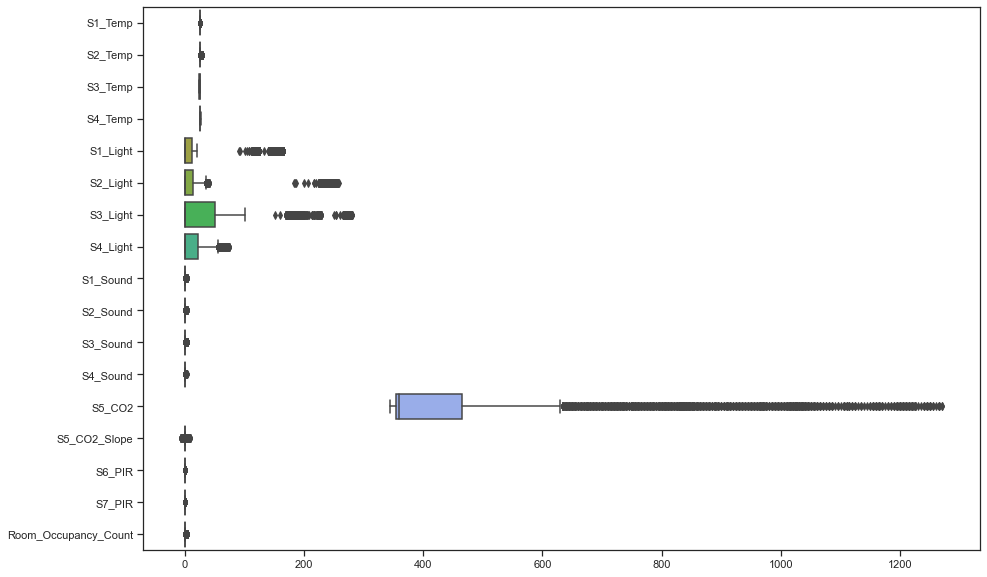

In [7]:
# plot the boxplot to see the outlier of each numerical column
plt.figure(figsize= (15,10))
sns.boxplot(data=df,orient="h")

### ---------> OBSERVATION
> There are some extreme values in `S5_CO2`. I want to explore it first.

## Interquartile Range

In [8]:
# calculate the q1 and q3 and then the iqr
q1_S5_CO2 = df['S5_CO2'].quantile(.25)
q3_S5_CO2 = df['S5_CO2'].quantile(.75)
iqr_S5_CO2 = q3_S5_CO2 - q1_S5_CO2

print("q1_S5_CO2:", q1_S5_CO2, "\n")
print("q3_S5_CO2:", q3_S5_CO2, "\n")
print("iqr_S5_CO2:", iqr_S5_CO2)

q1_S5_CO2: 355.0 

q3_S5_CO2: 465.0 

iqr_S5_CO2: 110.0


## Descriptive statistics for Variability

In [9]:
# look at the price mean
S5_CO2_mean = df['S5_CO2'].mean()
print("S5_CO2_mean:", S5_CO2_mean)
# look at the price median
S5_CO2_median = df['S5_CO2'].median()
print("S5_CO2_median:", S5_CO2_median)
# look at the price mode
S5_CO2_mode = df['S5_CO2'].mode().values[0]
print("S5_CO2_mode:", S5_CO2_mode)

S5_CO2_mean: 460.860400829302
S5_CO2_median: 360.0
S5_CO2_mode: 355


(0.0, 550.0)

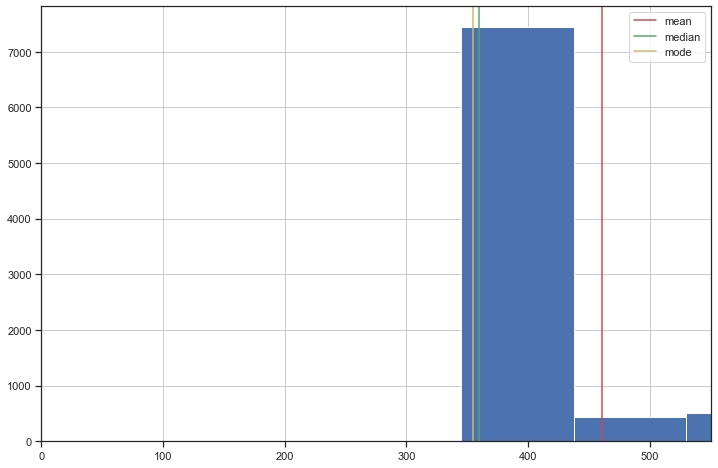

In [10]:
# plot the histogram with mean, median, and mode included
plt.figure(figsize=(12, 8))

df['S5_CO2'].hist()

plt.axvline(S5_CO2_mean, color='r', label='mean')
plt.axvline(S5_CO2_median, color='g', label='median')
plt.axvline(S5_CO2_mode, color='y', label='mode')

plt.legend()

# plt.ylim(0,50000)
plt.xlim(0,550)

### ---------> OBSERVATION
> The mean larger than the median indicates that the data is skewed to the left.

<a id="3.1.2"></a>
## 3.1.2 Detecting and Dealing with outliers

In [11]:
def detect_outliers_IQR(df):
   #Calculate the Q1:
   Q1 = np.percentile(df, 25)
   #Calculate the Q3:
   Q3 = np.percentile(df, 75)
   #Calculate the IQR:
   IQR=Q3-Q1
   # Upper bound
   upper = np.where(df >= (Q3+1.5*IQR))
   # Lower bound
   lower = np.where(df <= (Q1-1.5*IQR))
   #Outliers
   outliers = df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
   return outliers, upper, lower

> **`S1_Temp` column**

<AxesSubplot:>

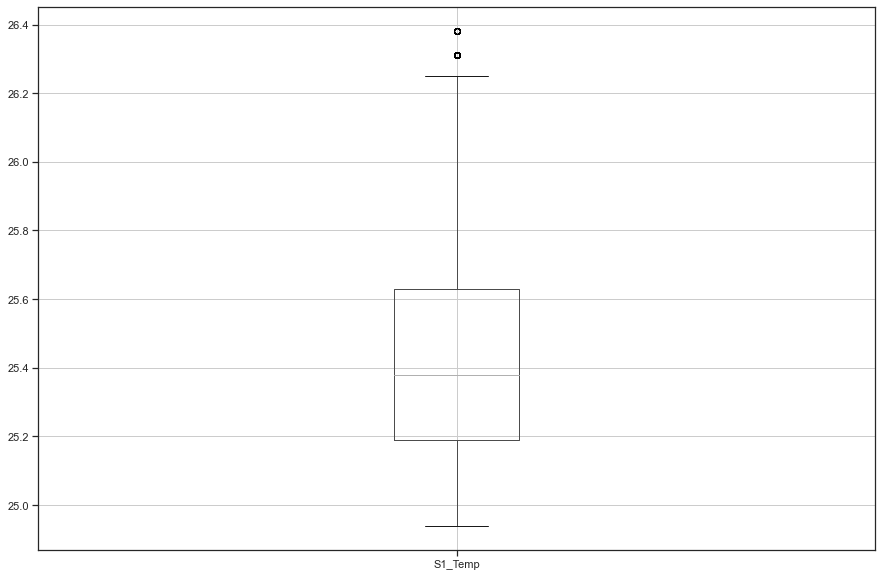

In [12]:
plt.figure(figsize= (15,10))

df.boxplot(column= "S1_Temp")

In [13]:
outliers, upper, lower = detect_outliers_IQR(df['S1_Temp'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))


number of outliers: 162
max outlier value: 26.38
min of outliers: 26.31
Percentage of outliers: 1.5993681508539834


### ---------> OBSERVATION
****
The percentage of outliers in `S1_Temp` is extremely small so that I want to replace them with mean, since it is better to develop a machine predicting the casual cases is better than in the extreme condition.

In [14]:
df.drop(upper[0], inplace = True)

> **`S2_Temp` column**

<AxesSubplot:>

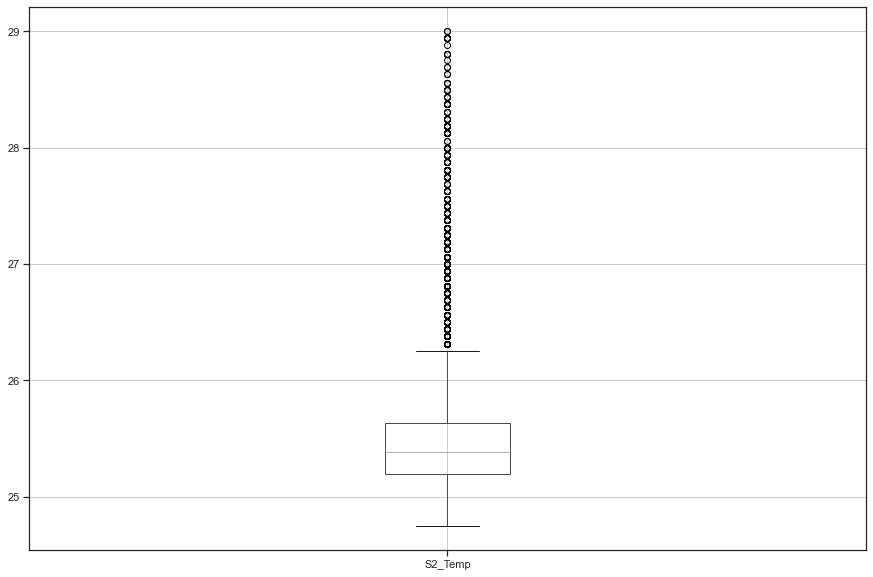

In [15]:
plt.figure(figsize= (15,10))
df.boxplot(column= "S2_Temp")

In [16]:
outliers, upper, lower = detect_outliers_IQR(df['S2_Temp'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 787
max outlier value: 29.0
min of outliers: 26.31
Percentage of outliers: 7.8960569880606


### ---------> OBSERVATION
****
The number is quite considerable, so I want to query them first.

In [17]:
extreme_temp = df[(df['S2_Temp'] > outliers.min()) & (df['S2_Temp'] < outliers.max())]
extreme_temp.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
129,2017/12/22,11:58:06,25.56,26.38,25.00,25.94,156,243,75,58,0.92,1.27,0.65,0.83,580,2.103846,1,1,2
130,2017/12/22,11:58:37,25.56,26.81,25.00,25.94,155,242,75,57,0.37,1.96,0.98,0.11,580,2.015385,1,1,2
131,2017/12/22,11:59:07,25.56,26.81,25.06,25.88,155,242,75,56,0.55,0.90,0.23,0.32,585,1.973077,1,1,2
132,2017/12/22,11:59:38,25.56,27.00,25.00,25.94,155,238,74,57,0.44,0.60,0.49,0.19,590,1.976923,1,1,2
133,2017/12/22,12:00:09,25.56,26.94,25.06,26.00,155,243,73,56,0.43,1.03,0.22,0.15,585,1.934615,1,1,2


In [18]:
occ_not_0 = extreme_temp[extreme_temp['Room_Occupancy_Count'] > 0]
print(len(occ_not_0)/len(extreme_temp) * 100)

69.35028248587571


### ---------> OBSERVATION
****
Most of the extreme temperature in the `S2_temp` have more than 1 people in the room so I want to drop in some cases that do not have people in room.

In [19]:
df.loc[(df['S2_Temp'] > outliers.min()) & (df['S2_Temp'] < outliers.max()) & (df['Room_Occupancy_Count'] < 1), 'S2_Temp'] = df['S2_Temp'].mean() 


> **`S3_Temp` column**

<AxesSubplot:>

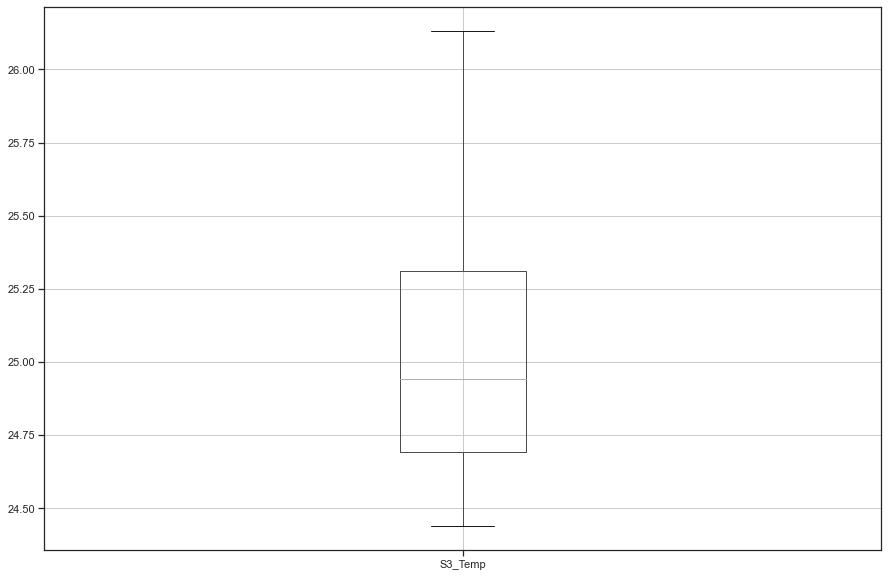

In [20]:
plt.figure(figsize= (15,10))
df.boxplot(column= "S3_Temp")

In [21]:
outliers, upper, lower = detect_outliers_IQR(df['S3_Temp'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 0
max outlier value: nan
min of outliers: nan
Percentage of outliers: 0.0


### ---------> OBSERVATION
****
There is no outliers.

> **`S4_Temp` column**

<AxesSubplot:>

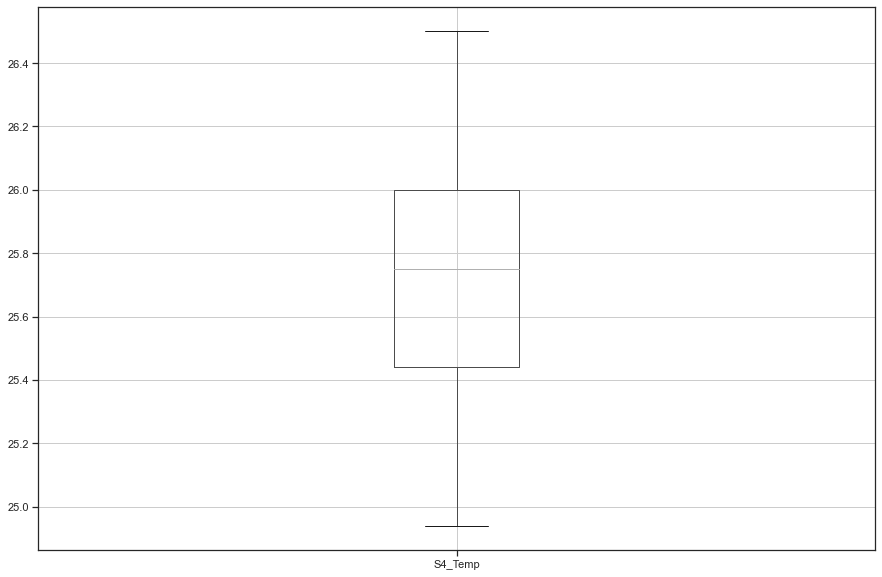

In [22]:
plt.figure(figsize= (15,10))
df.boxplot(column= "S4_Temp")

In [23]:
outliers, upper, lower = detect_outliers_IQR(df['S4_Temp'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 0
max outlier value: nan
min of outliers: nan
Percentage of outliers: 0.0


### ---------> OBSERVATION
****
There is no outliers.

> **`S1_Light` column**

<AxesSubplot:>

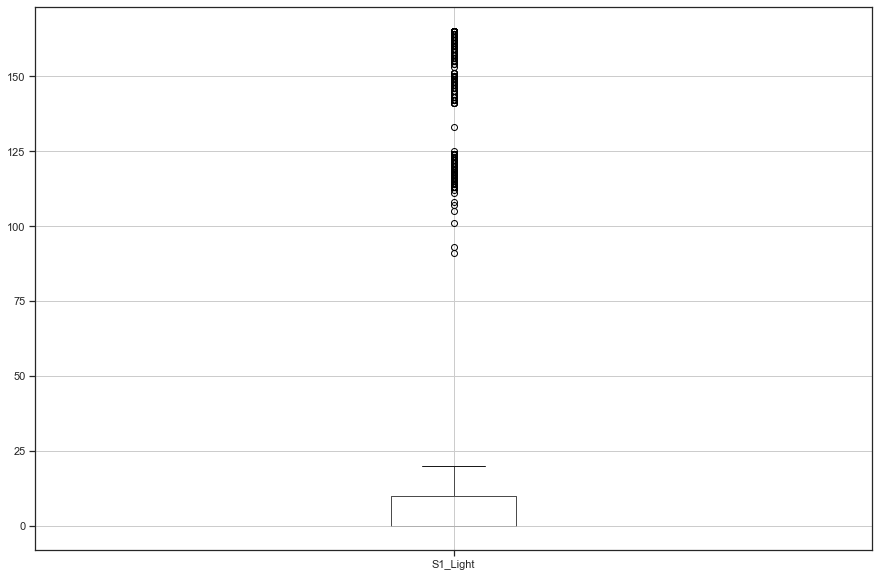

In [24]:
plt.figure(figsize= (15,10))
df.boxplot(column= "S1_Light")

In [25]:
outliers, upper, lower = detect_outliers_IQR(df['S1_Light'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 1565
max outlier value: 165
min of outliers: 91
Percentage of outliers: 15.701815992776162


### ---------> OBSERVATION
****
The number is quite considerable, so I want to query them first.

In [26]:
extreme_light = df[(df['S1_Light'] > outliers.min()) & (df['S1_Light'] < outliers.max())]
extreme_light.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [27]:
occ_not_0 = extreme_light[extreme_light['Room_Occupancy_Count'] > 0]
print(len(occ_not_0)/len(extreme_light) * 100)

100.0


### ---------> OBSERVATION
****
All of the outliers in the `S1_Light` have at least 1 people in that room, so I do not want to drop them.

> **`S2_Light` column**

<AxesSubplot:>

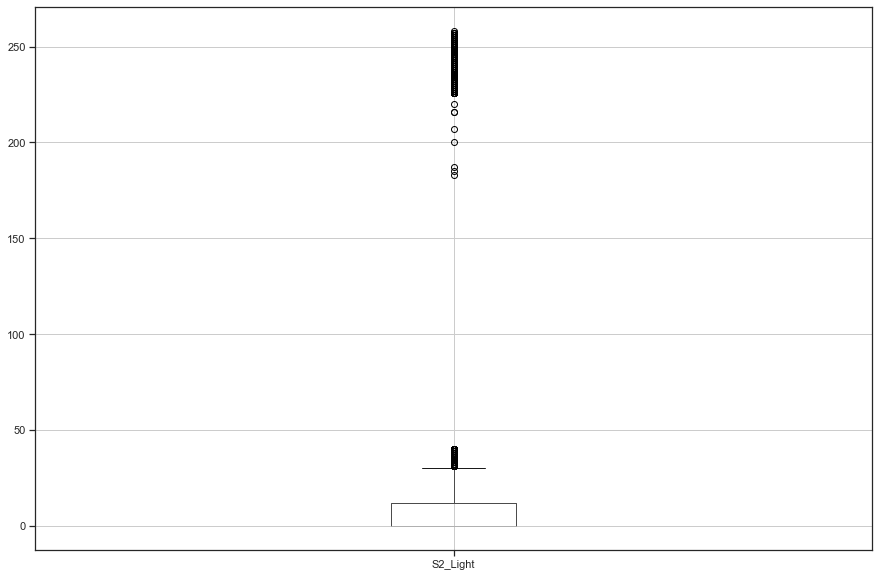

In [28]:
plt.figure(figsize= (15,10))
df.boxplot(column= "S2_Light")

In [29]:
outliers, upper, lower = detect_outliers_IQR(df['S2_Light'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 997
max outlier value: 258
min of outliers: 31
Percentage of outliers: 10.003009932778168


### ---------> OBSERVATION
****
The number is quite considerable, so I want to query them first.

In [30]:
extreme_light = df[(df['S2_Light'] > outliers.min()) & (df['S2_Light'] < outliers.max())]
extreme_light.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [31]:
occ_not_0 = extreme_light[extreme_light['Room_Occupancy_Count'] > 0]
print(len(occ_not_0)/len(extreme_light) * 100)

100.0


### ---------> OBSERVATION
****
All of the outliers in the `S2_Light` have at least 1 people in that room, so I do not want to drop them.

> **`S3_Light` column**

<AxesSubplot:>

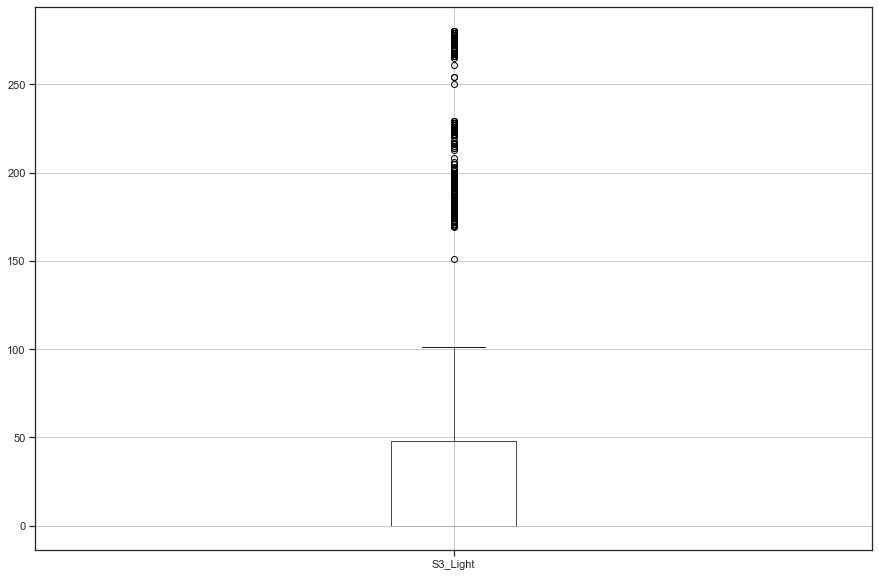

In [32]:
plt.figure(figsize= (15,10))
df.boxplot(column= "S3_Light")

In [33]:
outliers, upper, lower = detect_outliers_IQR(df['S3_Light'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 798
max outlier value: 280
min of outliers: 151
Percentage of outliers: 8.006421189926758


### ---------> OBSERVATION
****
The number is quite considerable, so I want to query them first.

In [34]:
extreme_light = df[(df['S3_Light'] > outliers.min()) & (df['S3_Light'] < outliers.max())]
extreme_light.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
190,2017/12/22,12:29:46,25.69,28.38,25.19,26.00,155,242,190,60,0.57,0.15,0.77,0.19,645,0.426923,1,0,2
191,2017/12/22,12:30:16,25.69,28.44,25.19,26.00,156,244,190,64,1.12,0.49,0.77,0.25,645,0.411538,1,1,3
192,2017/12/22,12:30:47,25.75,28.56,25.19,26.06,158,245,205,65,0.91,0.29,2.83,0.29,650,0.434615,1,1,3
193,2017/12/22,12:31:17,25.75,28.56,25.25,26.06,159,246,214,66,0.55,0.23,1.01,0.48,645,0.400000,1,1,3
194,2017/12/22,12:31:48,25.75,28.63,25.25,26.06,159,246,220,63,0.58,0.50,3.64,0.62,655,0.400000,1,1,3


In [35]:
occ_not_0 = extreme_light[extreme_light['Room_Occupancy_Count'] > 0]
print(len(occ_not_0)/len(extreme_light) * 100)

100.0


### ---------> OBSERVATION
****
All of the outliers in the `S3_Light` have at least 1 people in that room, so I do not want to drop them.

> **`S4_Light` column**

<AxesSubplot:>

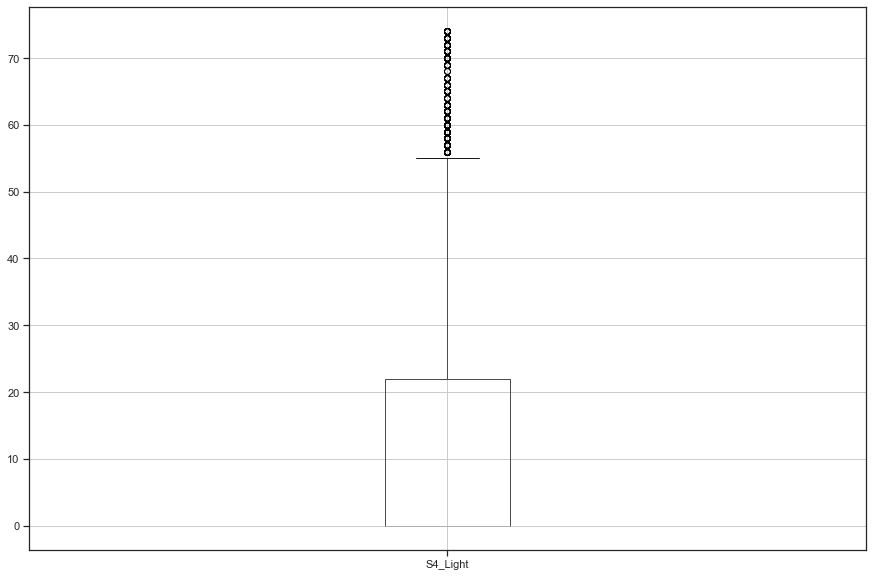

In [36]:
plt.figure(figsize= (15,10))
df.boxplot(column= "S4_Light")

In [37]:
outliers, upper, lower = detect_outliers_IQR(df['S4_Light'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 543
max outlier value: 74
min of outliers: 56
Percentage of outliers: 5.447978328483997


### ---------> OBSERVATION
****
The number is small, so I want to drop them

In [38]:
df.drop(upper[0], inplace = True)

df.loc[df['S4_Light'] > 50, 'S4_Light'] = np.nan #replace with null
df = df.dropna()


> **`S1_Sound` column**

<AxesSubplot:>

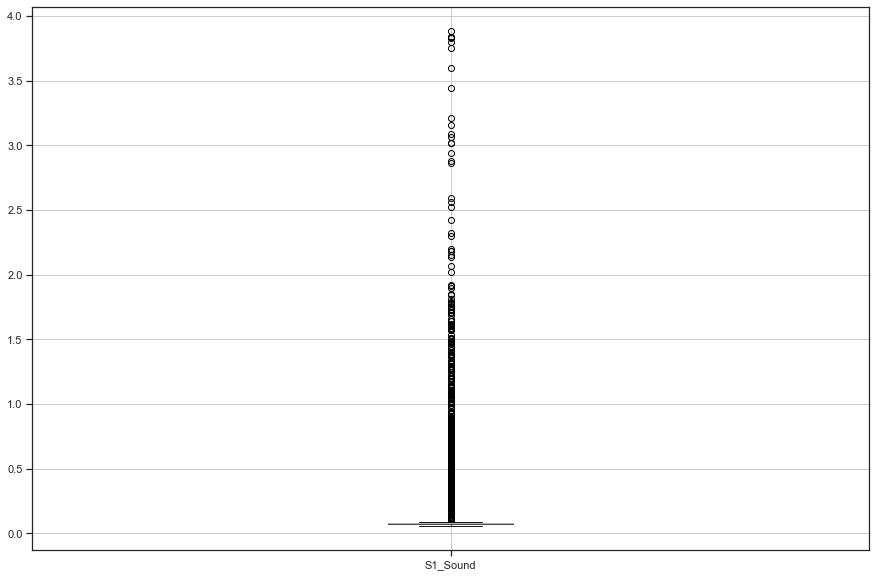

In [39]:
plt.figure(figsize= (15,10))
df.boxplot(column= "S1_Sound")

In [40]:
outliers, upper, lower = detect_outliers_IQR(df['S1_Sound'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 1096
max outlier value: 3.88
min of outliers: 0.1
Percentage of outliers: 12.266368214885283


### ---------> OBSERVATION
****
The number is quite considerable, so I want to query them first.

In [41]:
extreme_sound = df[(df['S1_Sound'] > outliers.min()) & (df['S1_Sound'] < outliers.max())]
extreme_sound.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40.0,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40.0,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40.0,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40.0,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
5,2017/12/22,10:52:14,25.00,24.81,24.56,25.44,121,34,54,40.0,0.13,0.06,0.06,0.07,390,0.165385,0,0,1


In [42]:
occ_not_0 = extreme_sound[extreme_sound['Room_Occupancy_Count'] > 0]
print(len(occ_not_0)/len(extreme_sound) * 100)

91.22807017543859


### ---------> OBSERVATION
****
Most of the extreme sound cases have the number of people at least 1 so I want to drop only some cases having no people in that room

In [43]:
df.loc[(df['S1_Sound'] > outliers.min()) & (df['S1_Sound'] < outliers.max()) & df['Room_Occupancy_Count'] < 1, 'S1_Sound'] = df['S1_Sound'].mean() 

> **`S2_Sound` column**

<AxesSubplot:>

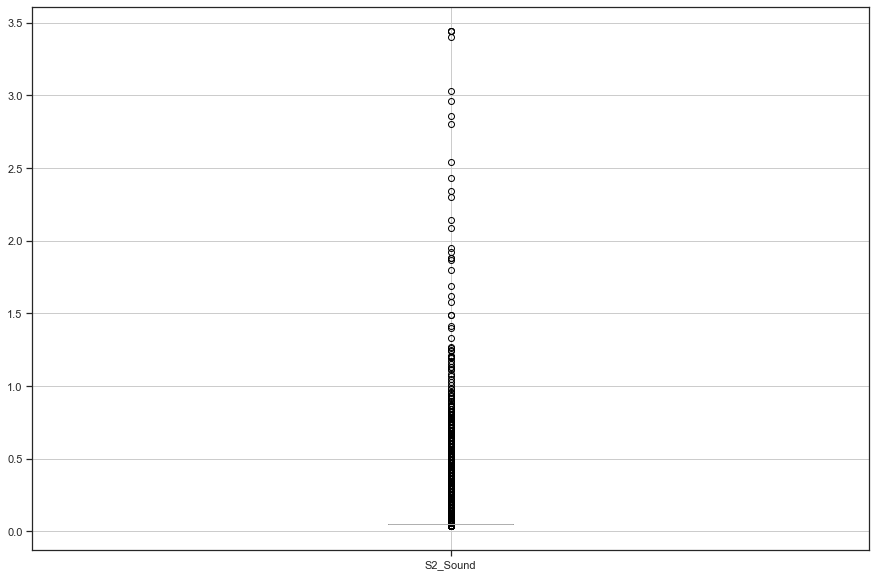

In [44]:
plt.figure(figsize= (15,10))
df.boxplot(column= "S2_Sound")

In [45]:
outliers, upper, lower = detect_outliers_IQR(df['S2_Sound'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 3447
max outlier value: 3.44
min of outliers: 0.04
Percentage of outliers: 38.57862339115837


### ---------> OBSERVATION
****
The number is quite considerable, so I want to query them first.

In [46]:
extreme_sound = df[(df['S2_Sound'] > outliers.min()) & (df['S2_Sound'] < outliers.max())]
extreme_sound.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40.0,0.129655,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40.0,0.930000,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40.0,0.430000,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40.0,0.410000,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40.0,0.180000,0.06,0.06,0.06,390,0.253846,0,0,1


In [47]:
occ_not_0 = extreme_sound[extreme_sound['Room_Occupancy_Count'] > 0]
print(len(occ_not_0)/len(extreme_sound) * 100)

15.961818904944982


### ---------> OBSERVATION
****
Most of the extreme sound cases have the number of people at least 1 so I want to drop only some cases having no people in that room

In [48]:
df.loc[(df['S2_Sound'] > outliers.min()) & (df['S2_Sound'] < outliers.max()) & df['Room_Occupancy_Count'] < 1, 'S2_Sound'] = df['S2_Sound'].mean() 

> **`S3_Sound` column**

<AxesSubplot:>

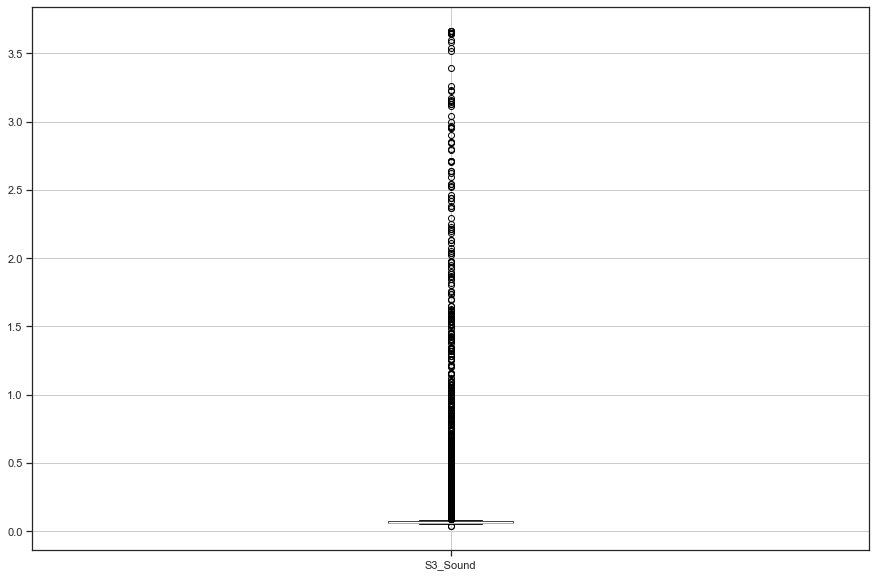

In [49]:
plt.figure(figsize= (15,10))
df.boxplot(column= "S3_Sound")

In [50]:
outliers, upper, lower = detect_outliers_IQR(df['S3_Sound'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 1021
max outlier value: 3.66
min of outliers: 0.04
Percentage of outliers: 11.426972579742586


### ---------> OBSERVATION
****
The number is quite considerable, so I want to query them first.

In [51]:
extreme_sound = df[(df['S3_Sound'] > outliers.min()) & (df['S3_Sound'] < outliers.max())]
extreme_sound.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40.0,0.129655,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40.0,0.930000,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40.0,0.430000,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40.0,0.410000,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40.0,0.180000,0.06,0.06,0.06,390,0.253846,0,0,1


In [52]:
occ_not_0 = extreme_sound[extreme_sound['Room_Occupancy_Count'] > 0]
print(len(occ_not_0)/len(extreme_sound) * 100)

13.540150072796505


### ---------> OBSERVATION
****
Most of the extreme sound cases have the number of people less than 1 so I want to drop them since the more people in the room the more extreme sound in that rooms have so it is quite not right if I keep those extreme sound and they become noise for the model in the trainnig process.

In [53]:
df.loc[(df['S3_Sound'] > outliers.min()) & (df['S3_Sound'] < outliers.max()), 'S3_Sound'] = df['S3_Sound'].mean() 

> **`S4_Sound` column**

<AxesSubplot:>

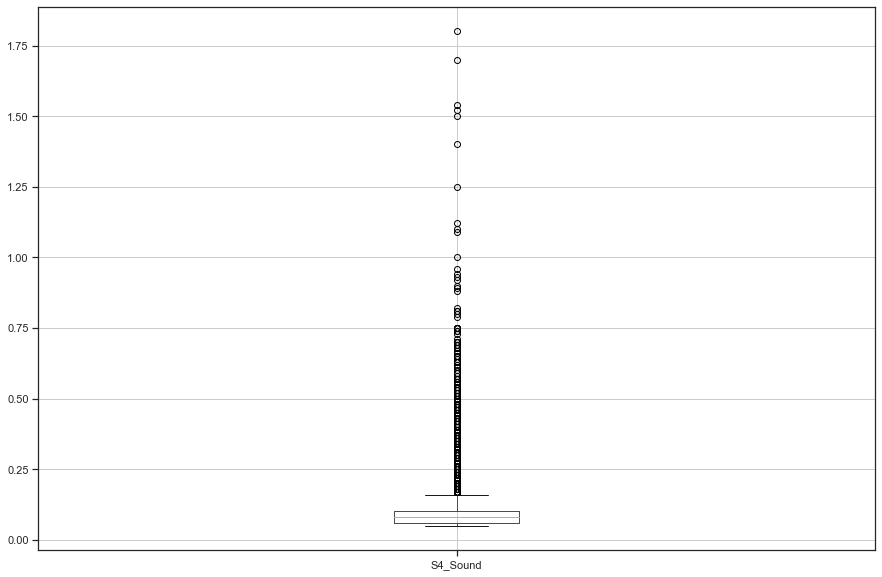

In [54]:
plt.figure(figsize= (15,10))
df.boxplot(column= "S4_Sound")

In [55]:
outliers, upper, lower = detect_outliers_IQR(df['S4_Sound'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 363
max outlier value: 1.8
min of outliers: 0.17
Percentage of outliers: 4.062674874090655


### ---------> OBSERVATION
****
The number is quite considerable, so I want to query them first.

In [56]:
extreme_sound = df[(df['S4_Sound'] > outliers.min()) & (df['S4_Sound'] < outliers.max())]
extreme_sound.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
9,2017/12/22,10:54:17,25.00,24.81,24.56,25.50,101,34,57,43.0,3.840000,0.64,0.123802,0.39,390,-0.188462,1,1,1
10,2017/12/22,10:54:47,25.06,24.81,24.56,25.44,122,35,57,43.0,2.200000,0.31,0.123802,0.21,390,-0.276923,1,1,1
480,2017/12/22,15:25:55,25.81,25.88,25.69,26.31,112,34,76,49.0,0.900000,0.36,0.123802,0.20,595,-3.526923,0,0,1
489,2017/12/22,15:30:30,25.88,25.88,25.63,26.31,120,34,71,45.0,0.129655,0.05,0.123802,0.21,590,-1.907692,0,0,1
494,2017/12/22,15:33:03,25.94,25.88,25.63,26.31,120,34,70,44.0,1.710000,0.63,0.123802,0.30,580,-1.284615,0,0,1


In [57]:
occ_not_0 = extreme_sound[extreme_sound['Room_Occupancy_Count'] > 0]
print(len(occ_not_0)/len(extreme_sound) * 100)

97.68115942028986


### ---------> OBSERVATION
****
Most of the extreme sound cases have the number of people at least 1 so I want to drop only some cases having no people in that room

In [58]:
df.loc[(df['S4_Sound'] > outliers.min()) & (df['S4_Sound'] < outliers.max()) & df['Room_Occupancy_Count'] < 1, 'S4_Sound'] = df['S4_Sound'].mean() 

> **`S5_CO2` column**

<AxesSubplot:>

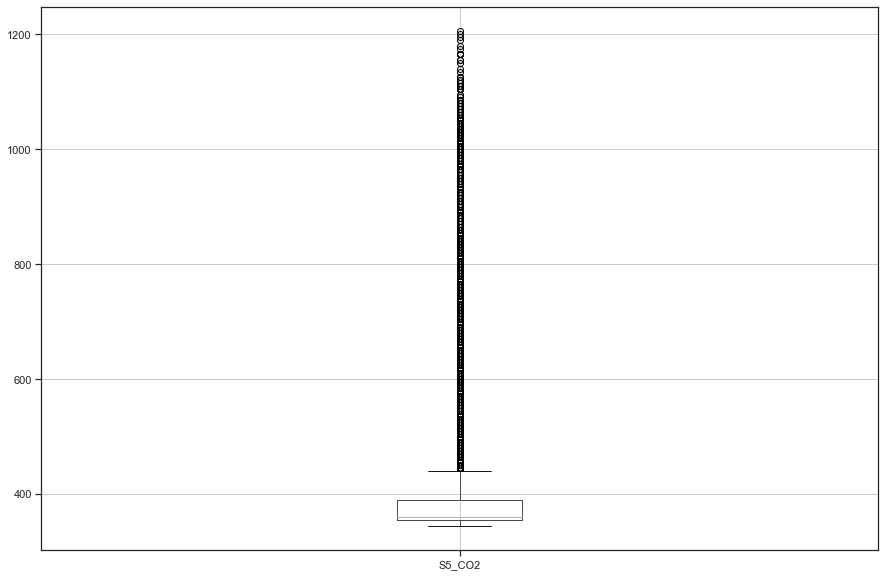

In [59]:
plt.figure(figsize= (15,10))
df.boxplot(column= "S5_CO2")

In [60]:
outliers, upper, lower = detect_outliers_IQR(df['S5_CO2'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 1984
max outlier value: 1205
min of outliers: 445
Percentage of outliers: 22.20481253497482


### ---------> OBSERVATION
****
The number is quite considerable, so I want to query them first.

In [61]:
extreme_CO2 = df[(df['S5_CO2'] > outliers.min()) & (df['S5_CO2'] < outliers.max())]
extreme_CO2.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
72,2017/12/22,11:26:27,25.31,25.00,24.81,25.75,123,37,64,49.0,0.360000,0.090000,0.123802,0.092685,450,0.984615,1,0,1
73,2017/12/22,11:27:28,25.31,25.25,24.88,25.75,123,31,61,46.0,0.480000,0.310000,0.123802,0.092685,450,1.100000,1,1,1
74,2017/12/22,11:27:59,25.31,25.63,24.81,25.75,124,29,62,46.0,0.510000,0.550000,0.123802,0.092685,450,1.103846,1,1,1
75,2017/12/22,11:28:29,25.38,25.44,24.81,25.69,150,187,63,49.0,0.129655,0.087095,0.123802,0.092685,450,1.088462,1,1,2
76,2017/12/22,11:29:00,25.38,25.44,24.81,25.75,153,216,63,49.0,0.129655,0.087095,0.123802,0.092685,450,1.003846,1,1,2


In [62]:
occ_not_0 = extreme_CO2[extreme_CO2['Room_Occupancy_Count'] > 0]
print(len(occ_not_0)/len(extreme_CO2) * 100)

51.99386503067485


### ---------> OBSERVATION
****
Most of the extreme CO2 cases have the number of people at least 1 so I want to drop only some cases having no people in that room

In [63]:
df.loc[(df['S5_CO2'] > outliers.min()) & (df['S5_CO2'] < outliers.max()) & df['Room_Occupancy_Count'] < 1, 'S5_CO2'] = df['S5_CO2'].mean() 

> **`S5_CO2_Slope` column**

<AxesSubplot:>

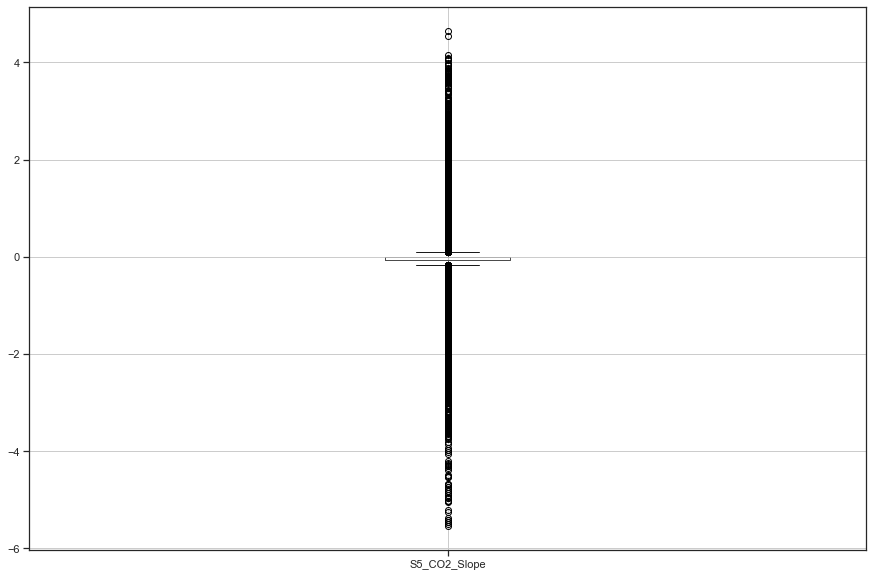

In [64]:
plt.figure(figsize= (15,10))
df.boxplot(column= "S5_CO2_Slope")

In [65]:
outliers, upper, lower = detect_outliers_IQR(df['S5_CO2_Slope'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min of outliers: "+ str(outliers.min()))

print("Percentage of outliers: "+ str(len(outliers)/len(df) * 100))

number of outliers: 2886
max outlier value: 4.63846153846
min of outliers: -5.53461538462
Percentage of outliers: 32.29994404029099


### ---------> OBSERVATION
****
The number is quite considerable, so I want to query them first.

In [66]:
extreme_CO2 = df[(df['S5_CO2_Slope'] > outliers.min()) & (df['S5_CO2_Slope'] < outliers.max())]
extreme_CO2.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40.0,0.129655,0.19,0.123802,0.092685,439.693341,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40.0,0.930000,0.05,0.123802,0.092685,439.693341,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40.0,0.430000,0.11,0.123802,0.092685,439.693341,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40.0,0.410000,0.10,0.123802,0.092685,439.693341,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40.0,0.180000,0.06,0.123802,0.092685,439.693341,0.253846,0,0,1


In [67]:
occ_not_0 = extreme_CO2[extreme_CO2['Room_Occupancy_Count'] > 0]
print(len(occ_not_0)/len(extreme_CO2) * 100)

13.567670435464011


### ---------> OBSERVATION
****
Most of the extreme CO2 cases do not have the number of people at least 1 so I want to drop only some cases having no people in that room

In [68]:
df = df[df['S5_CO2_Slope'] < 5]

## Check dataset after dropping outliers

In [69]:
print ("The shape of the train data is (row, column):"+ str(df.shape))
print (df.info())

The shape of the train data is (row, column):(8935, 19)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8935 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  8935 non-null   object 
 1   Time                  8935 non-null   object 
 2   S1_Temp               8935 non-null   float64
 3   S2_Temp               8935 non-null   float64
 4   S3_Temp               8935 non-null   float64
 5   S4_Temp               8935 non-null   float64
 6   S1_Light              8935 non-null   int64  
 7   S2_Light              8935 non-null   int64  
 8   S3_Light              8935 non-null   int64  
 9   S4_Light              8935 non-null   float64
 10  S1_Sound              8935 non-null   float64
 11  S2_Sound              8935 non-null   float64
 12  S3_Sound              8935 non-null   float64
 13  S4_Sound              8935 non-null   float64
 14  S5_CO2         

<a id="3.2"></a>
# 3.2 Correlation between columns

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

<Figure size 1080x720 with 0 Axes>

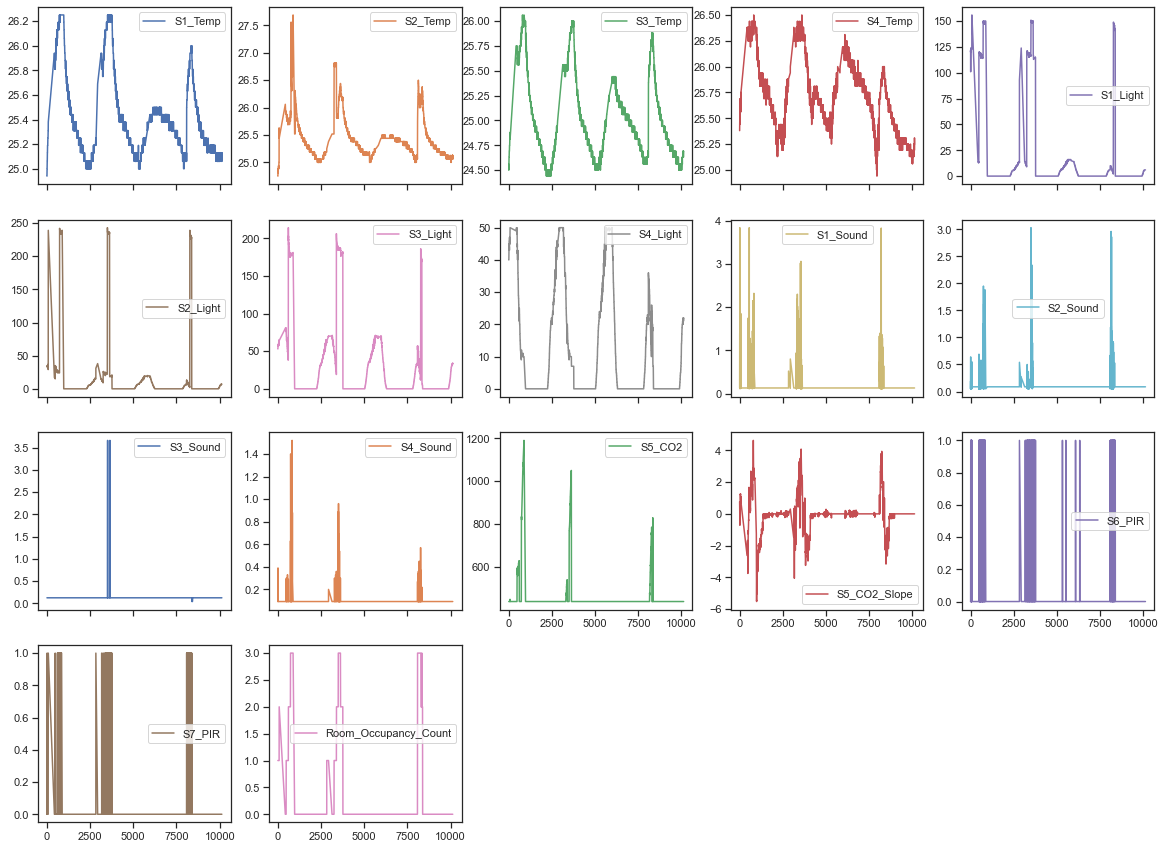

In [70]:
plt.figure(figsize= (15,10))
df.plot(subplots=True, layout=(4,5))

### ---------> OBSERVATION
****
Since there are no normal distribution so we cannot use the Pearson Correlation HeatMap. Since then, we use the Spearman’s rho method to test [[1](#Link1)]

<a id="3.2.1"></a>
## 3.2.1 Correlation of the temperature sensors
****

## RQ1. What is the correlation between `S1_Temp` and `S2_Temp`?
*****
**The null hypothesis($H_0$) and Alternating hypothesis($H_1$)**:
> * The **null hypothesis($H_0$)** : `S1_Temp` and `S2_Temp` are correlated.
> *  An **Alternative hypothesis($H_A$)**: `S1_Temp` and `S2_Temp` are not correlated.

**Significance level** = 0.05

In [71]:
# calculate spearman's correlation
stats.spearmanr(df['S1_Temp'], df['S2_Temp'])

SpearmanrResult(correlation=0.9762454335749811, pvalue=0.0)

### ---------> OBSERVATION
****
The column `S1_Temp` and `S2_Temp` are correlated because: 
> - The Spearman’s rho correlation score is high: 0.97
> - P-values is lower than the ***Significant level*** so we ***cannot reject the null hypothesis***.

## RQ2. What is the correlation between `S1_Temp` and `S3_Temp`?
****
**The null hypothesis($H_0$) and Alternating hypothesis($H_1$)**:
> * The **null hypothesis($H_0$)** : `S1_Temp` and `S3_Temp` are correlated.
> *  An **Alternative hypothesis($H_A$)**: `S1_Temp` and `S3_Temp` are not correlated.

**Significance level** = 0.05

In [72]:
# calculate spearman's correlation
stats.spearmanr(df['S1_Temp'], df['S3_Temp'])

SpearmanrResult(correlation=0.9587035246419001, pvalue=0.0)

### ---------> OBSERVATION
****
The column `S1_Temp` and `S3_Temp` are correlated because: 
> - The Spearman’s rho correlation score is high: 0.95
> - P-values is lower than the ***Significant level*** so we ***cannot reject the null hypothesis***.

## RQ3. What is the correlation between `S1_Temp` and `S4_Temp`?
***
**The null hypothesis($H_0$) and Alternating hypothesis($H_1$)**:
> * The **null hypothesis($H_0$)** : `S1_Temp` and `S4_Temp` are correlated.
> *  An **Alternative hypothesis($H_A$)** `S1_Temp` and `S4_Temp` are not correlated.

**Significance level** = 0.05

In [73]:
# calculate spearman's correlation
stats.spearmanr(df['S1_Temp'], df['S4_Temp'])

SpearmanrResult(correlation=0.8555895825862023, pvalue=0.0)

### ---------> OBSERVATION
****
The column `S1_Temp` and `S4_Temp` are correlated because: 
> - The Spearman’s rho correlation score is high: 0.85
> - P-values is lower than the ***Significant level*** so we ***cannot reject the null hypothesis***.

<a id="3.2.2"></a>
## 3.2.2 Correlation of the light sensors

## RQ3. What is the correlation between `S1_Light` and `S2_Light`?
***
**The null hypothesis($H_0$) and Alternating hypothesis($H_1$)**:
> * The **null hypothesis($H_0$)** : `S1_Light` and `S2_Light` are correlated.
> *  An **Alternative hypothesis($H_A$)** `S1_Light` and `S2_Light` are not correlated.

**Significance level** = 0.05

In [74]:
# calculate spearman's correlation
stats.spearmanr(df['S1_Light'], df['S2_Light'])

SpearmanrResult(correlation=0.9984929760387772, pvalue=0.0)

### ---------> OBSERVATION
****
The column `S1_Light` and `S2_Light` are correlated because: 
> - The Spearman’s rho correlation score is high: 0.99
> - P-values is lower than the ***Significant level*** so we ***cannot reject the null hypothesis***.

## RQ4. What is the correlation between `S1_Light` and `S3_Light`?
*****
**The null hypothesis($H_0$) and Alternating hypothesis($H_1$)**:
> * The **null hypothesis($H_0$)** : `S1_Light` and `S3_Light` are correlated.
> *  An **Alternative hypothesis($H_A$)** `S1_Light` and `S3_Light` are not correlated.

**Significance level** = 0.05

In [75]:
# calculate spearman's correlation
stats.spearmanr(df['S1_Light'], df['S3_Light'])

SpearmanrResult(correlation=0.9668749067596133, pvalue=0.0)

### ---------> OBSERVATION
****
The column `S1_Light` and `S3_Light` are correlated because: 
> - The Spearman’s rho correlation score is high: 0.96
> - P-values is lower than the ***Significant level*** so we ***cannot reject the null hypothesis***.

## RQ5. What is the correlation between `S1_Light` and `S4_Light`?
***
**The null hypothesis($H_0$) and Alternating hypothesis($H_1$)**:
> * The **null hypothesis($H_0$)** : `S1_Light` and `S4_Light` are correlated.
> *  An **Alternative hypothesis($H_A$)** `S1_Light` and `S4_Light` are not correlated.

**Significance level** = 0.05

In [76]:
# calculate spearman's correlation
stats.spearmanr(df['S1_Light'], df['S4_Light'])

SpearmanrResult(correlation=0.9335931979165112, pvalue=0.0)

### ---------> OBSERVATION
****
The column `S1_Light` and `S4_Light` are correlated because: 
> - The Spearman’s rho correlation score is high: 0.93
> - P-values is lower than the ***Significant level*** so we ***cannot reject the null hypothesis***.

<a id="3.2.3"></a>
## 3.2.3 Correlation of the sound sensors

## RQ6. What is the correlation between `S1_Sound` and `S2_Sound`?
****
**The null hypothesis($H_0$) and Alternating hypothesis($H_1$)**:
> * The **null hypothesis($H_0$)** : `S1_Sound` and `S2_Sound` are correlated.
> *  An **Alternative hypothesis($H_A$)** `S1_Sound` and `S2_Sound` are not correlated.

**Significance level** = 0.05

In [77]:
# calculate spearman's correlation
stats.spearmanr(df['S1_Sound'], df['S2_Sound'])

SpearmanrResult(correlation=0.46993946600962266, pvalue=0.0)

### ---------> OBSERVATION
****
The column `S1_Sound` and `S2_Sound` are weakly correlated because: 
> - The Spearman’s rho correlation score is weak: 0.46
> - P-values is lower than the ***Significant level*** so we ***cannot reject the null hypothesis***.

## RQ7. What is the correlation between `S1_Sound` and `S3_Sound`?
****
**The null hypothesis($H_0$) and Alternating hypothesis($H_1$)**:
> * The **null hypothesis($H_0$)** : `S1_Sound` and `S3_Sound` are correlated.
> *  An **Alternative hypothesis($H_A$)** `S1_Sound` and `S3_Sound` are not correlated.

**Significance level** = 0.05

In [78]:
# calculate spearman's correlation
stats.spearmanr(df['S1_Sound'], df['S3_Sound'])

SpearmanrResult(correlation=0.03534897193977941, pvalue=0.000831941379145106)

### ---------> OBSERVATION
****
The column `S1_Sound` and `S3_Sound` are weakly correlated because: 
> - The Spearman’s rho correlation score is weak: 0.035. This positive correlation is not significant, however, if we have the greatter dataset, that correlation will have some influences 
> - P-values is lower than the ***Significant level*** so we ***cannot reject the null hypothesis***.

## RQ8. What is the correlation between `S1_Sound` and `S4_Sound`?
*****
**The null hypothesis($H_0$) and Alternating hypothesis($H_1$)**:
> * The **null hypothesis($H_0$)** : `S1_Sound` and `S4_Sound` are correlated.
> *  An **Alternative hypothesis($H_A$)** `S1_Sound` and `S4_Sound` are not correlated.

**Significance level** = 0.05

In [79]:
# calculate spearman's correlation
stats.spearmanr(df['S1_Sound'], df['S4_Sound'])

SpearmanrResult(correlation=0.4662564413894677, pvalue=0.0)

### ---------> OBSERVATION
****
The column `S1_Sound` and `S4_Sound` are weakly correlated because: 
> - The Spearman’s rho correlation score is weak: 0.46. This positive correlation is not significant, however, if we have the greatter dataset, that correlation will have some influences 
> - P-values is lower than the ***Significant level*** so we ***cannot reject the null hypothesis***.

<a id="3.2.4"></a>
## 3.2.4 Correlation of the CO2 sensors

## RQ9. What is the correlation between `S5_CO2` and `S5_CO2_Slope`?
*****
**The null hypothesis($H_0$) and Alternating hypothesis($H_1$)**:
> * The **null hypothesis($H_0$)** : `S5_CO2` and `S5_CO2_Slope` are correlated.
> *  An **Alternative hypothesis($H_A$)** `S5_CO2` and `S5_CO2_Slope` are not correlated.

**Significance level** = 0.05

In [80]:
# calculate spearman's correlation
stats.spearmanr(df['S5_CO2'], df['S5_CO2_Slope'])

SpearmanrResult(correlation=0.3625940364831634, pvalue=8.693585535294296e-276)

### ---------> OBSERVATION
****
The column `S5_CO2` and `S5_CO2_Slope` are weakly correlated because: 
> - The Spearman’s rho correlation score is weak: 0.36. This positive correlation is not significant, however, if we have the greatter dataset, that correlation will have some influences 
> - P-values is lower than the ***Significant level*** so we ***cannot reject the null hypothesis***.

## RQ10. What is the correlation between `S6_PIR` and `S7_PIR`?
*****
**The null hypothesis($H_0$) and Alternating hypothesis($H_1$)**:
> * The **null hypothesis($H_0$)** : `S6_PIR` and `S7_PIR` are correlated.
> *  An **Alternative hypothesis($H_A$)** `S6_PIR` and `S7_PIR` are not correlated.

**Significance level** = 0.05

In [81]:
# calculate spearman's correlation
stats.spearmanr(df['S6_PIR'], df['S7_PIR'])

SpearmanrResult(correlation=0.5689214761105028, pvalue=0.0)

### ---------> OBSERVATION
****
The column `S6_PIR` and `S7_PIR` are weakly correlated because: 
> - The Spearman’s rho correlation score is weak: 0.56. This positive correlation is not significant, however, if we have the greatter dataset, that correlation will have some influences 
> - P-values is lower than the ***Significant level*** so we ***cannot reject the null hypothesis***.

<a id="3.2.5"></a>
## 3.2.5 Multicorrelational problem:
***
Abformentioned, the multicorrelation is a problem for the model training process, I want to drop `S2_Temp`, `S3_Temp` `S4_Temp`, `S2_Light`, `S3_Light` and `S4_Light`. [[2](#Link2)]

In [82]:
df = df.drop(columns=['S2_Temp', 'S3_Temp', 'S4_Temp', 
                      'S2_Light', 'S3_Light', 'S4_Light', 
                      'S2_Sound', 'S3_Sound', 'S4_Sound',
                      'S5_CO2_Slope', 'S7_PIR'
                     ])

<a id="3.3"></a>
# 3.3 Analyse Room Occupation causation:
*****
First of all, I want to analysise and reduce dimension by using Factor Analysis. A linear statistical model is factor analysis, it is used to explain variance in observable variables and to condense a group of observed variables into an unobserved variable known as factors. A linear mixture of components and error terms is used to model observed variables (Source). A factor or hidden variable is linked to many observable variables with similar response patterns. Each component accounts for a certain percentage of the variance in the observed variables. By minimizing the number  of variables, it aids data interpretation.

## Principle Component Analysis vs. Factor Analysis:
*****
> - PCA components account for the most variance, whereas factor analysis accounts for data covariance.
> - PCA components are entirely orthogonal to one another, although factor analysis factors do not have to be.
> - The observed variables in the PCA component are linear combinations of the observed variable, whereas the observed variables in the FA component are linear combinations of the unseen variable or factor.
> - PCA components are difficult to understand. Underlying components in FA can be labeled and interpreted.
> - PCA is a dimensionality reduction technique, whereas factor analysis is a latent variable analysis technique.
> - A type of factor analysis is PCA. FA is a modeling approach, whereas PCA is an observational technique.

## Check the `Room_Occupancy_Count` Content

In [83]:
df['Room_Occupancy_Count'].describe()

count    8935.000000
mean        0.279463
std         0.762859
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: Room_Occupancy_Count, dtype: float64

## Query the time in a day:

In [84]:
morning = df[(df['Time'] > '04:30:00') & (df['Time'] < '12:00:00')].mean()
print(morning)

print("\n")
morning_proportion = len(morning)/len(df)
not_stay_proportion = len(df[(df['Time'] > '04:30:00') & (df['Time'] < '12:00:00')]['Room_Occupancy_Count']==0)/len(df[df['Room_Occupancy_Count']==0])
print("Proportion of the day: "+str(morning_proportion))
print("Proportion of people do not stay in the room: "+str(not_stay_proportion))

S1_Temp                  25.121092
S1_Light                  6.996829
S1_Sound                  0.140311
S5_CO2                  439.704236
S6_PIR                    0.011628
Room_Occupancy_Count      0.029598
dtype: float64


Proportion of the day: 0.0006715165081141578
Proportion of people do not stay in the room: 0.36752136752136755


/var/folders/l5/0ygc5m0x66xc7d4v2qzjjv0h0000gn/T/ipykernel_24726/1142759118.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  morning = df[(df['Time'] > '04:30:00') & (df['Time'] < '12:00:00')].mean()


In [85]:
lunch = df[(df['Time'] > '12:30:00') & (df['Time'] < '19:00:00')].mean()
print(lunch)

print("\n")
lunch_proportion = len(lunch)/len(df)
not_stay_proportion = len(df[(df['Time'] > '12:30:00') & (df['Time'] < '19:00:00')]['Room_Occupancy_Count']==0)/len(df[df['Room_Occupancy_Count']==0])
print("Proportion of the day: "+str(lunch_proportion))
print("Proportion of people do not stay in the room: "+str(not_stay_proportion))

S1_Temp                  25.839359
S1_Light                 64.792399
S1_Sound                  0.240026
S5_CO2                  527.559279
S6_PIR                    0.250709
Room_Occupancy_Count      1.254112
dtype: float64


Proportion of the day: 0.0006715165081141578
Proportion of people do not stay in the room: 0.2283087283087283


/var/folders/l5/0ygc5m0x66xc7d4v2qzjjv0h0000gn/T/ipykernel_24726/1677049863.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  lunch = df[(df['Time'] > '12:30:00') & (df['Time'] < '19:00:00')].mean()


In [86]:
night = df[(df['Time'] > '19:30:00') & (df['Time'] < '23:00:00')].mean()
print(night)

print("\n")
night_proportion = len(night)/len(df)
not_stay_proportion = len(df[(df['Time'] > '19:30:00') & (df['Time'] < '23:00:00')]['Room_Occupancy_Count']==0)/len(df[df['Room_Occupancy_Count']==0])
print("Proportion of the day: "+str(night_proportion))
print("Proportion of people do not stay in the room: "+str(not_stay_proportion))

S1_Temp                  25.596552
S1_Light                  3.080726
S1_Sound                  0.129655
S5_CO2                  439.693341
S6_PIR                    0.009387
Room_Occupancy_Count      0.053817
dtype: float64


Proportion of the day: 0.0006715165081141578
Proportion of people do not stay in the room: 0.20694120694120693


/var/folders/l5/0ygc5m0x66xc7d4v2qzjjv0h0000gn/T/ipykernel_24726/1296693756.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  night = df[(df['Time'] > '19:30:00') & (df['Time'] < '23:00:00')].mean()


### ------------> OBSERVATION
***
Suprisingly, people often stay in the room in the lunch and afternoon time, rather in the moring or in night.

## Query the date:
****

In [87]:
df.groupby('Date').mean()

,S1_Temp,S1_Light,S1_Sound,S5_CO2,S6_PIR,Room_Occupancy_Count
Date,,,,,,
2017/12/22,25.799904,55.510117,0.236405,507.879225,0.172524,0.757188
2017/12/23,25.502446,28.025031,0.161957,466.136322,0.066475,0.409110
2017/12/24,25.241823,0.954887,0.129655,439.693341,0.000000,0.000000
2017/12/25,25.350613,3.936554,0.129655,439.693341,0.004326,0.000000
2017/12/26,25.237902,0.895579,0.129655,439.693341,0.000000,0.000000
2018/01/10,25.573139,17.186560,0.175660,466.243470,0.177533,0.791374
2018/01/11,25.151164,0.793893,0.129655,439.693341,0.000000,0.000000


### ------------> OBSERVATION
***
It is not suprising that in the holiday between `2017/12/24` and `2017/12/26` people do not stay in room. In `2017/12/22` people tend to stay in room.

Text(0.5, 1.0, 'Date people do not stay in room')

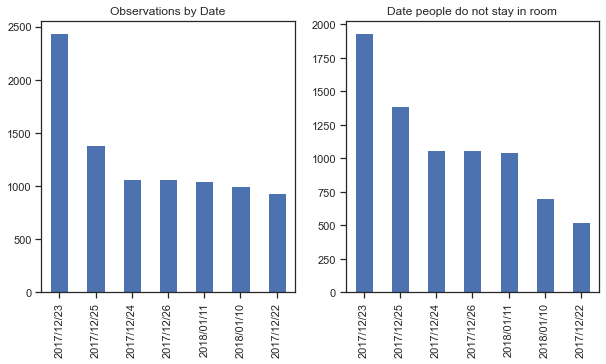

In [88]:
plt.subplot(1,2,1)
df.Date.value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Observations by Date')
plt.subplot(1,2,2)
df[df['Room_Occupancy_Count']==0].Date.value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Date people do not stay in room')

In [89]:
df[df['Date']=='2017/12/26'].mean()

/var/folders/l5/0ygc5m0x66xc7d4v2qzjjv0h0000gn/T/ipykernel_24726/2314346403.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['Date']=='2017/12/26'].mean()


S1_Temp                  25.237902
S1_Light                  0.895579
S1_Sound                  0.129655
S5_CO2                  439.693341
S6_PIR                    0.000000
Room_Occupancy_Count      0.000000
dtype: float64

In [90]:
df[df['Date']=='2017/12/22'].mean()

/var/folders/l5/0ygc5m0x66xc7d4v2qzjjv0h0000gn/T/ipykernel_24726/1477576456.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['Date']=='2017/12/22'].mean()


S1_Temp                  25.799904
S1_Light                 55.510117
S1_Sound                  0.236405
S5_CO2                  507.879225
S6_PIR                    0.172524
Room_Occupancy_Count      0.757188
dtype: float64

### ------------> OBSERVATION
***
As we can see that the values for the `S1_Light`, and `S5_CO2` is significantly different. But let's check it with the ***factor analysis.*** Before taking the ***Factor Analysis***, the ***Bartlett’s test*** need to be tested first to confirm the correlation matrix is not an identity matrix.

<a id="3.3.1"></a>
# 3.3.1 Bartlett’s test:
*****
## Bartlett’s test
*****
Using the observed correlation matrix against the identity matrix, Bartlett's test of sphericity determines whether the observed variables intercorrelate at all. You should not use a factor analysis if the test results were statistically insignificant.
***
**The null hypothesis($H_0$) and Alternating hypothesis($H_1$)**:
> * The **null hypothesis($H_0$)** : the observed correlation matrix is not an identity matrix.
> *  An **Alternative hypothesis($H_A$)** the observed correlation matrix is an identity matrix.

**Significance level** = 0.05

In [91]:
#Factor analysis is just for the numerical data so I select only numerical columns
factor_analysis_df = df[['S1_Temp', 'S1_Light', 'S1_Sound', 'S5_CO2', 'S6_PIR', 'Room_Occupancy_Count']]

In [92]:
chi_square_value,p_value=calculate_bartlett_sphericity(factor_analysis_df)
chi_square_value, p_value

(26487.711031542083, 0.0)

### ------------> OBSERVATION
***
The p-value in this Bartlett's test is 0. The analysis confirmed that the observed correlation matrix is not an identity matrix.

## Calculate KMO:
***
***The Kaiser-Meyer-Olkin (KMO)*** Test determines if data is suitable for factor analysis. It assesses the suitability of each observed variable as well as the entire model. The fraction of variance among all observable variables is estimated by KMO. A smaller fraction is better for factor analysis. KMO values vary from 0 to 1. A KMO value of less than 0.6 is deemed insufficient.

In [93]:
kmo_all,kmo_model=calculate_kmo(factor_analysis_df)

In [94]:
kmo_model

0.8372198532292721

### ------------> OBSERVATION
***
Our data has a KMO of 0.82, which is great. This number implies that your intended factor analysis can proceed.

<a id="3.3.2"></a>
# 3.3.2 Choosing the Number of Factors:
*****
The Kaiser criterion and the scree plot may be used to determine the number of factors. Eigenvalues are used in both.

In [95]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(factor_analysis_df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([3.5254491 , 0.83684484, 0.68164059, 0.48067724, 0.29394225,
       0.18144598])

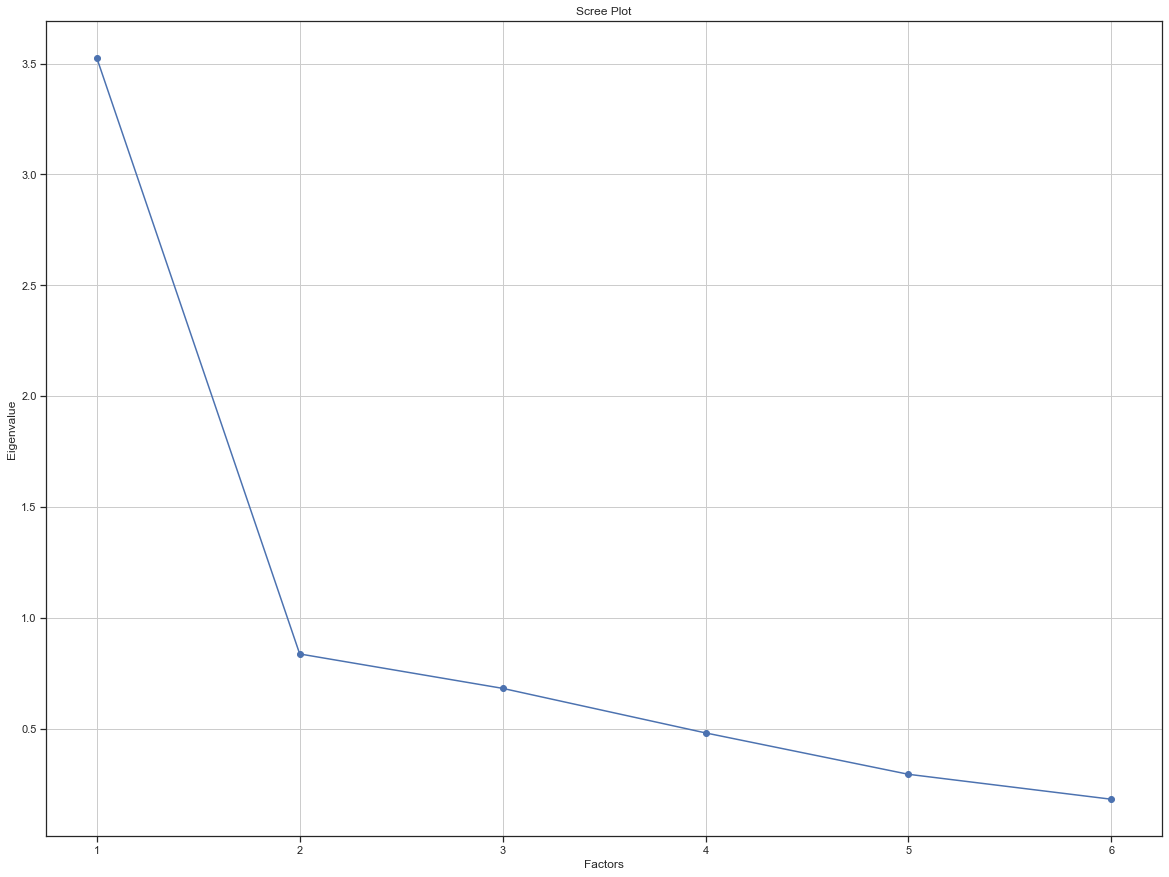

In [96]:
# Create scree plot using matplotlib
plt.scatter(range(1,factor_analysis_df.shape[1]+1),ev)
plt.plot(range(1,factor_analysis_df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

### ------------> OBSERVATION
***
For each factor and its eigenvalues, the scree plot approach generates a straight line. The number of factors is determined by the number of eigenvalues greater than one.

Only for 3-factors are eigenvalues greater than one, as seen above. This means we only have to choose six factors (or unobserved variables).

In [97]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=3,rotation='varimax')
fa.fit(factor_analysis_df)
pd.DataFrame(fa.loadings_,index=factor_analysis_df.columns)

,0,1,2
S1_Temp,0.748613,0.201322,0.213287
S1_Light,0.702799,0.292357,0.424452
S1_Sound,0.132796,0.293601,0.363832
S5_CO2,0.309961,0.927227,0.199669
S6_PIR,0.328515,0.102004,0.645596
Room_Occupancy_Count,0.653877,0.385754,0.509704


### ------------> OBSERVATION
****
> - Factor 0 has high factor loadings for S1_Temp,S1_Light,S5_CO2, and Room_Occupancy_Count (Extraversion)
> - Factor 1 has high factor loadings for S1_Sound,S2_Sound, and S4_Sound (Neuroticism)
> - Factor 2 has high factor loadings for S5_CO2,S5_CO2_Slope,and Room_Occupancy_Count (Conscientiousness)

In [98]:
# Get variance of each factors
pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])

,0,1,2
Variance,1.703536,1.231165,1.074485
Proportional Var,0.283923,0.205194,0.179081
Cumulative Var,0.283923,0.489117,0.668198


### ------------> OBSERVATION
***
Total 56% Cumulative Variance explained by the 4 factors.

## Calculate the correlation between the `Room_Occupancy_Count` and other columns

In [99]:
# calculate spearman's correlation
correlation, _ = spearmanr(df['Room_Occupancy_Count'], df['S1_Temp'])
print (correlation)
correlation, _ = spearmanr(df['Room_Occupancy_Count'], df['S1_Light'])
print (correlation)
correlation, _ = spearmanr(df['Room_Occupancy_Count'], df['S1_Sound'])
print (correlation)
correlation, _ = spearmanr(df['Room_Occupancy_Count'], df['S5_CO2'])
print (correlation)
correlation, _ = spearmanr(df['Room_Occupancy_Count'], df['S6_PIR'])
print (correlation)
correlation, _ = spearmanr(df['Room_Occupancy_Count'], df['Date'])
print (correlation)
correlation, _ = spearmanr(df['Room_Occupancy_Count'], df['Time'])
print (correlation)

0.5229219353476656
0.6661128086807799
0.5905189999458323
0.6682454157679452
0.6035099209708316
-0.23752705371517363
0.21370512571518394


### ------------> OBSERVATION
***
The strongest correlation between the `Room_Occupancy_Count` and other variable is:
> - `Room_Occupancy_Count` and `S1_Light`.
> - `Room_Occupancy_Count` and `S5_CO2`.
> - `Room_Occupancy_Count` and `S6_PIR`.
> - `Room_Occupancy_Count` and `S1_Sound`.


In [100]:
#Create factors
factor1 = df[['S5_CO2', 'S6_PIR']]
factor2 = df[['S5_CO2', 'S1_Sound']]
factor3 = df[['S5_CO2', 'S1_Temp']]
factor4 = df[['S5_CO2', 'S1_Light']]


#Get cronbach alpha
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
factor3_alpha = pg.cronbach_alpha(factor3)
factor4_alpha = pg.cronbach_alpha(factor4)


print(factor1_alpha, factor2_alpha, factor3_alpha, factor4_alpha)

(0.003663632305854314, array([-0.039,  0.044])) (0.0031017776325712454, array([-0.039,  0.044])) (0.007431698804936326, array([-0.035,  0.048])) (0.6216418194336457, array([0.606, 0.637]))


### ------------> OBSERVATION
***
> - The alphas are 0.62, 0.60, and 0.63, respectively, indicating that they are helpful and coherent. These additional variables might be used as variables in further analyses or predictions.

## Summary
****
> - According to the correlation, the main factor that affect the `Room_Occupancy_Count` is the `S5_CO2`.
> - `S5_CO2` and  `S1_Light` factors often occur together when there is at least one people in the room

<a id="3.4"></a>
# 3.4 Analyse Room Occupation in different condition:
*****
This part is divided into 2 main parts:
> - EDA and statistical test the main factors (`S1_Light` and `S5_CO2` with the `Room_Occupancy_Count`)
> - Statistical test the main factors (`S1_Light` and `S5_CO2` with the `Room_Occupancy_Count`)

## Our hypothesis:
> - The higher the people the room have the higher `S1_Light` is
> - The higher the people the room have the higher `S5_CO2` is

<a id="3.4.1"></a>
## 3.4.1 EDA the main factors (`S1_Light` and `S5_CO2` with the `Room_Occupancy_Count`)
*****

## Distribution of Room Occupancy Count

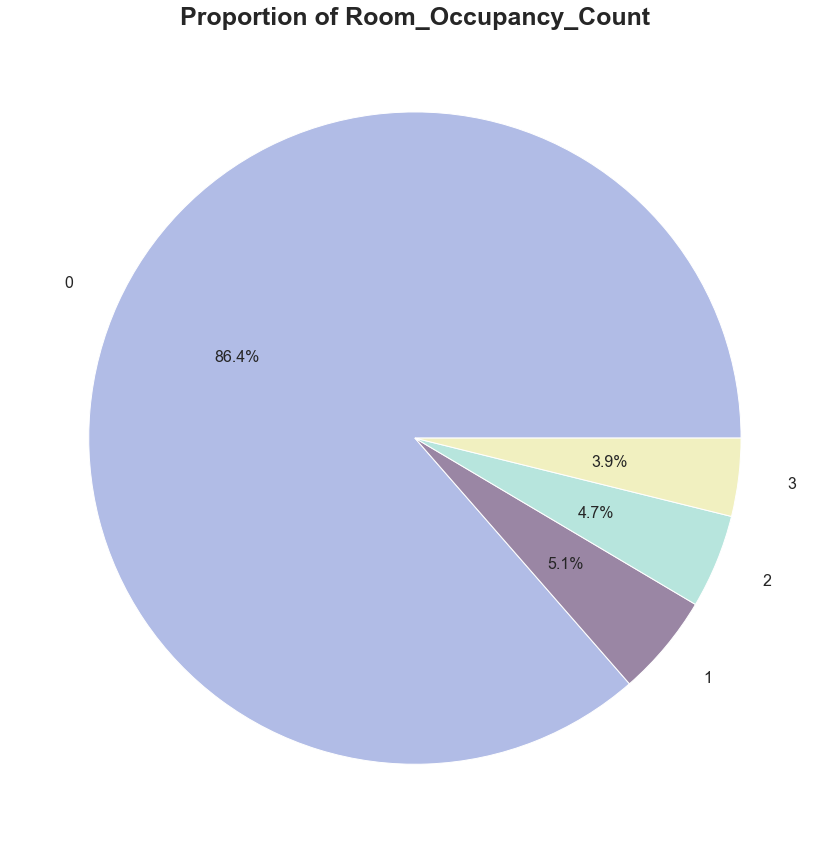

In [101]:
# Pie chart
labels = ['0', '1', '2', '3']
#colors
colors = ['#B1BCE6', '#9A86A4', '#B7E5DD', '#F1F0C0']
ax = plt.pie(df['Room_Occupancy_Count'].value_counts(), labeldistance=1.15, labels=labels, colors=colors, autopct='%1.1f%%', textprops={'fontsize': 16});
plt.title('Proportion of Room_Occupancy_Count', fontsize=25, fontweight = 'bold')
plt.rcParams['figure.figsize'] = [20, 15]
plt.show()

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>The class is <span style="color:#122ecc;">heavily imbalanced </span>.</li>
    <li>Suprisingly, <span style="color:#122ecc;">most of </span> records <span style="color:#122ecc;">don't people in the room</span>.</li>
</ul>
</div>

## How high `S1_Light` of each Room Occupancy Type?

([<matplotlib.axis.XTick at 0x7fe36967d0d0>,
 [Text(0, 0, 'No one'),
  Text(1, 0, '1 Person'),
  Text(2, 0, '2 People'),
  Text(3, 0, '3 People')])

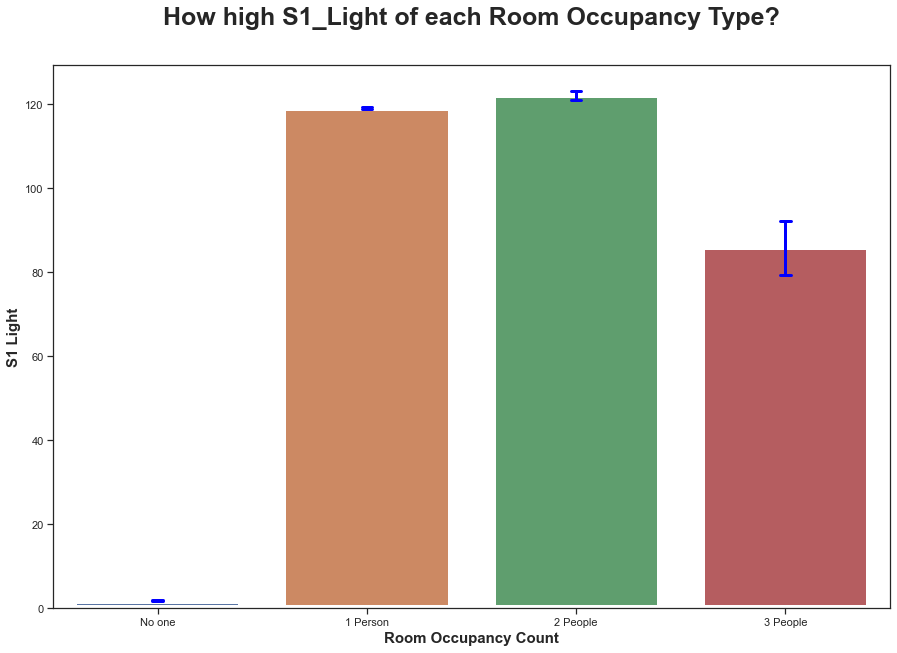

In [102]:
plt.subplots(figsize = (15,10))

sns.barplot(x = "Room_Occupancy_Count", y = "S1_Light", data=df, linewidth=6, capsize = .05, errcolor='blue', errwidth = 3)
plt.title("How high S1_Light of each Room Occupancy Type?", fontsize = 25, fontweight = 'bold', pad=40)
plt.xlabel("Room Occupancy Count", fontsize = 15, fontweight = 'bold')
plt.ylabel("S1 Light", fontsize = 15, fontweight = 'bold')
names = ['No one', '1 Person', '2 People', '3 People']
val = [0,1,2,3] ## this is just a temporary trick to get the label right. 
plt.xticks(val, names)

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>Suprisingly, the S1_Light in the rooms <span style="color:#122ecc;">having 3 people </span> are <span style="color:#122ecc;"> lower than </span> the room <span style="color:#122ecc;">having 1 and 2 people </span>.</li>
    <li>It is unexpected that S1_Light in the rooms <span style="color:#122ecc;">having 1 people </span> just slight lower than <span style="color:#122ecc;"> lower than </span> the room <span style="color:#122ecc;">having 2 people </span> .</li>
    <li>However, it is optimised that the room <span style="color:#122ecc;">having no one </span> consume nearly <span style="color:#122ecc;"> no light </span> in the room.</li>
</ul>
</div> 

## Function for box plot visualization

In [103]:
PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}
def plot_box(dataset, x, y, xlabel, ylabel, title, subtitle, color, title_position, subtitle_position, order=None):
    ax = sns.boxplot(data = dataset, y = y, x = x, order = order,
                 linewidth = 1.2, color = color, **PROPS,
                 flierprops = dict(marker = 'o', markeredgecolor = 'black', markersize = 6.5, linestyle = 'none', markerfacecolor = color, alpha = 0.9))

    plt.xlabel(xlabel, fontweight = 'bold', fontsize = 16)
    plt.ylabel(ylabel, fontweight = 'bold', fontsize = 16)
    ax.tick_params(labelsize = 14)
    ax.text(x = title_position, y = 1.07, s = title, fontsize = 22.5, weight = 'bold', ha = 'center', va = 'bottom', transform = ax.transAxes)
    ax.text(x = subtitle_position, y = 1.03, s = subtitle, fontsize = 16.5, alpha = 0.75, ha = 'center', va = 'bottom', transform = ax.transAxes)
    plt.show()

## How high CO2 in different type of Room Occupancy?

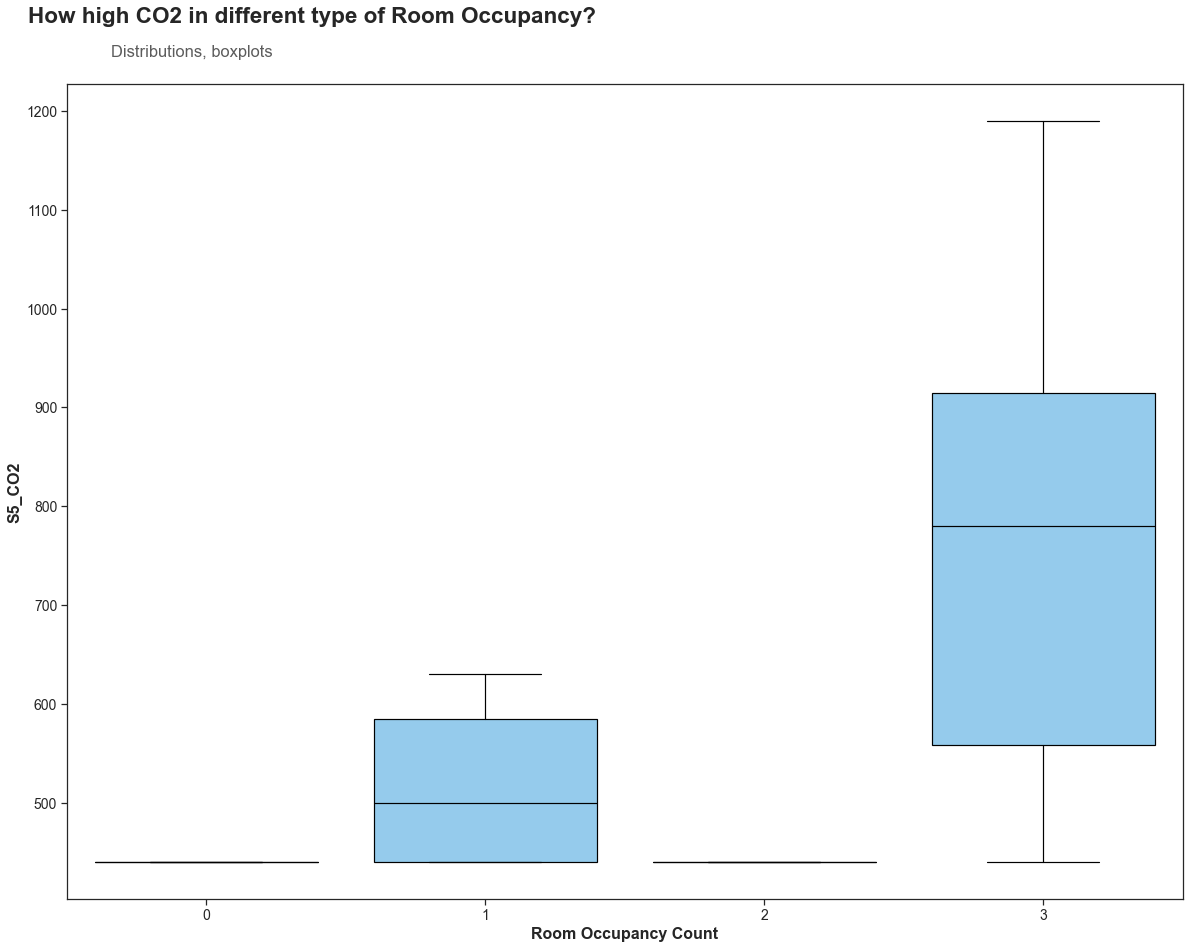

In [104]:
plot_box(df, x = "Room_Occupancy_Count", y = "S5_CO2", xlabel = 'Room Occupancy Count', ylabel = "S5_CO2", title = "How high CO2 in different type of Room Occupancy?",
         subtitle = "Distributions, boxplots", color = "lightskyblue", title_position = 0.22, subtitle_position = 0.112)

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=15uX4fnuDMuki2xAnjK8wv-ifJhAkBtJ2" align="left" hspace="10px" vspace="0px"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:'Times New Roman';font-size:30px;font-style: italic;color:  #6468e8">OBSERVATION:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Yu Mincho Demibold;font-size:20px;color:black">
    <li>Suprisingly, the S1_Light in the rooms <span style="color:#122ecc;">having 3 people </span> are <span style="color:#122ecc;"> lower than </span> the room <span style="color:#122ecc;">having 1 and 2 people </span>. Since then, we will have a statistical test on this.</li>
    <li>It is unexpected that S1_Light in the rooms <span style="color:#122ecc;">having 1 people </span> just slight lower than <span style="color:#122ecc;"> lower than </span> the room <span style="color:#122ecc;">having 2 people </span> .</li>
    <li>However, it is optimised that the room <span style="color:#122ecc;">having no one </span> consume nearly <span style="color:#122ecc;"> no light </span> in the room.</li>
</ul>
</div>

<a id="3.4.2"></a>
## 3.4.2 Statistical Test:
*****
> - The CO2 in the rooms having 1 people is higher than 2 people, the reason maybe because the 1-person rooms have higher temperature, light than the rooms having 2 people.
*****
## S1_Temp column:
**The null hypothesis($H_0$) and Alternating hypothesis($H_1$)**:
> * The **null hypothesis($H_0$)** : `S1_Temp` in ***1-person rooms*** is lower than ***2-people rooms*** .
> *  An **Alternative hypothesis($H_A$)** `S1_Temp` in ***1-person rooms*** is equal or higher than ***2-people rooms*** .

**Significance level** = 0.05

**** 
For hypothesis testing I use Mann-Whitney testing since our data is non-normal distribution

In [105]:
roon_1 = df[df['Room_Occupancy_Count'] == 1]
roon_2 = df[df['Room_Occupancy_Count'] == 2]

In [106]:
# perform two-sided test. You can use 'greater' or 'less' for one-sided test
stats.mannwhitneyu(x=roon_1['S1_Temp'], y=roon_2['S1_Temp'], alternative = 'two-sided')

MannwhitneyuResult(statistic=19680.5, pvalue=1.2275902950431476e-74)

### ---------> OBSERVATION
****
The column `S1_Temp`in the rooms having 1 person is lower : 
> - Room_1_person has lower mean than Room_2_person
> - P-values is lower than the ***Significant level*** so we ***cannot reject the null hypothesis***.

## S1_Light column:
**The null hypothesis($H_0$) and Alternating hypothesis($H_1$)**:
> * The **null hypothesis($H_0$)** : `S1_Light` in ***1-person rooms*** is lower than ***2-people rooms*** .
> *  An **Alternative hypothesis($H_A$)** `S1_Light` in ***1-person rooms*** is equal or lower than ***2-people rooms*** .

**Significance level** = 0.05

In [107]:
stats.mannwhitneyu(x=roon_1['S1_Light'], y=roon_2['S1_Light'], alternative = 'two-sided')

MannwhitneyuResult(statistic=104601.0, pvalue=9.097639734802572e-17)

### ---------> OBSERVATION
****
The column `S1_Light`in the rooms having 1 person is lower : 
> - Room_1_person has lower mean than Room_2_person
> - P-values is lower than the ***Significant level*** so we ***cannot reject the null hypothesis***.

In [108]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S1_Temp,8935.0,25.414314,0.329275,24.940000,25.190000,25.310000,25.500000,26.25
S1_Light,8935.0,16.319642,40.451038,0.000000,0.000000,0.000000,6.000000,156.00
S1_Sound,8935.0,0.154817,0.164104,0.110000,0.129655,0.129655,0.129655,3.84
S5_CO2,8935.0,457.033975,81.862700,439.693341,439.693341,439.693341,439.693341,1190.00
S6_PIR,8935.0,0.056743,0.231364,0.000000,0.000000,0.000000,0.000000,1.00
Room_Occupancy_Count,8935.0,0.279463,0.762859,0.000000,0.000000,0.000000,0.000000,3.00


<a id="3.5"></a>

<p><img alt="Insight logo" src="https://drive.google.com/uc?export=view&id=14dpaeXX-ajsM8quwe3dCCdQdrdvf29iI" align="left" hspace="20px" vspace="20px" width="45" height="60" ></p>
<br>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Yu Mincho Demibold;font-size:40px;font-style: italic;color:  #6468e8">3.5 Summary</li>
</ul>
<ul style="list-style-type:none;font-family:Yu Mincho Demibold;font-size:20px;color:  black">
    <br>
    
*******
    
<li>1. Suprisingly, <span style="color:#122ecc;">the room having 1 and 2 people have higher S1_Light than the room having 3 people</span>.</li>
<br>
<li>2. Suprisingly, the S1_Light in the rooms <span style="color:#122ecc;">having 3 people </span> are <span style="color:#122ecc;"> lower than </span> the room <span style="color:#122ecc;">having 1 and 2 people </span>. </li>
<br>
<li>3. After conducting t-statistical test, The CO2 in the rooms having 1 people is higher than 2 people, the reason maybe because the 1-person rooms have <span style="color:#122ecc;">higher temperature, light </span> than the rooms having 2 people. </li>
<br>    
</ul>



<a id="4"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>4. References</strong></h1>

*****

<a id="Link1"></a>
- [1] [Correlation Coefficient | Types, Formulas & Examples](https://www.scribbr.com/statistics/correlation-coefficient/)

<a id="Link2"></a>
- [2] [Multicollinearity in Data Science](https://www.analyticsvidhya.com/blog/2021/03/multicollinearity-in-data-science/)